# EDA

In [3]:
# Load basic libraries

import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Fixing the figure size

rcParams['figure.figsize'] = 7,6

In [5]:
# Impoting the dataset 

df_sales =pd.read_csv("k_circle_sales.csv")

In [6]:
df_sales.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy     249.8            OUT049   
1            Soft Drinks      48.3            OUT018   
2                   Meat     141.6            OUT049   
3  Fruits and Vegetables     182.1            OUT010   
4              Household      53.9            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 2   
1                       2009      Medium               Tier 2   
2                       1999      Medium               Tier 2   
3                       1998         NaN                  NaN   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [7]:
# checking the number of rows and columns
print('number of rows:', df_sales.shape[0])
print('number of columns:', df_sales.shape[1])

number of rows: 8523
number of columns: 12


In [8]:
# General information about the dataset
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Descriptive Statistics

In [9]:
df_sales['Item_Weight'].mean()

12.857645184135976

In [10]:
df_sales['Item_Weight'].median()

12.6

In [11]:
df_sales['Item_Weight'].mode()

0    12.15
Name: Item_Weight, dtype: float64

In [12]:
df_sales['Item_Weight'].value_counts()

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

In [13]:
# Five point summary of the data
df_sales.describe().T 

count         mean          std       min  \
Item_Weight                7060.0    12.857645     4.643456     4.555   
Item_Visibility            8523.0     0.066132     0.051598     0.000   
Item_MRP                   8523.0   140.998838    62.258099    31.300   
Outlet_Establishment_Year  8523.0  1997.831867     8.371760  1985.000   
Item_Outlet_Sales          8523.0  2181.288914  1706.499616    33.290   

                                   25%          50%          75%           max  
Item_Weight                   8.773750    12.600000    16.850000     21.350000  
Item_Visibility               0.026989     0.053931     0.094585      0.328391  
Item_MRP                     93.800000   142.700000   185.650000    266.900000  
Outlet_Establishment_Year  1987.000000  1999.000000  2004.000000   2009.000000  
Item_Outlet_Sales           834.247400  1794.331000  3101.296400  13086.964800

### Univariate Analysis of the data

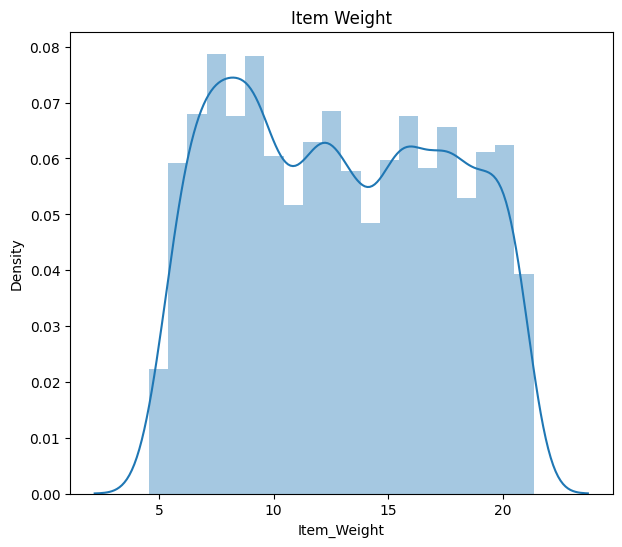

In [14]:
sns.distplot(df_sales['Item_Weight'])
plt.title("Item Weight")
plt.show()

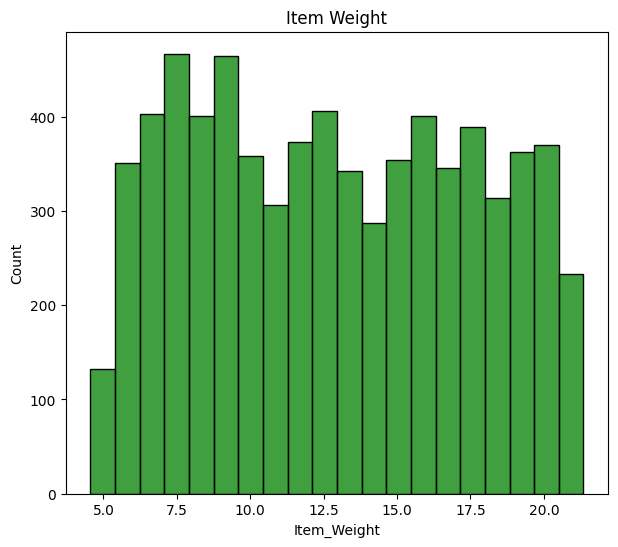

In [15]:
sns.histplot(df_sales['Item_Weight'],color='green')
plt.title("Item Weight")
plt.show()

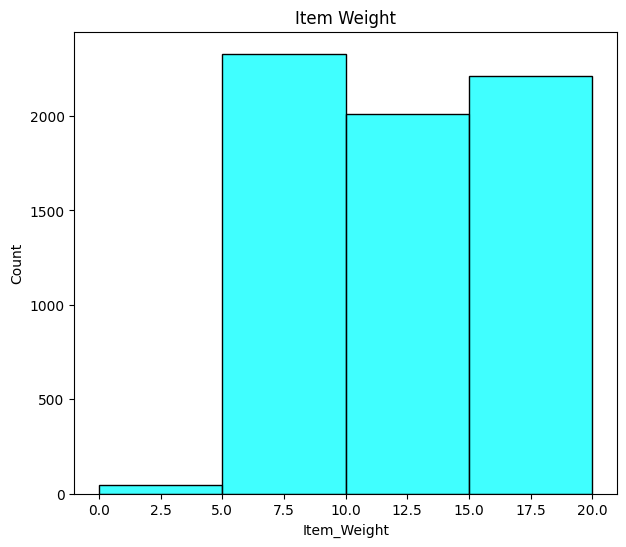

In [16]:
sns.histplot(df_sales['Item_Weight'],bins=[0,5,10,15,20],color='cyan')
plt.title("Item Weight")
plt.show()

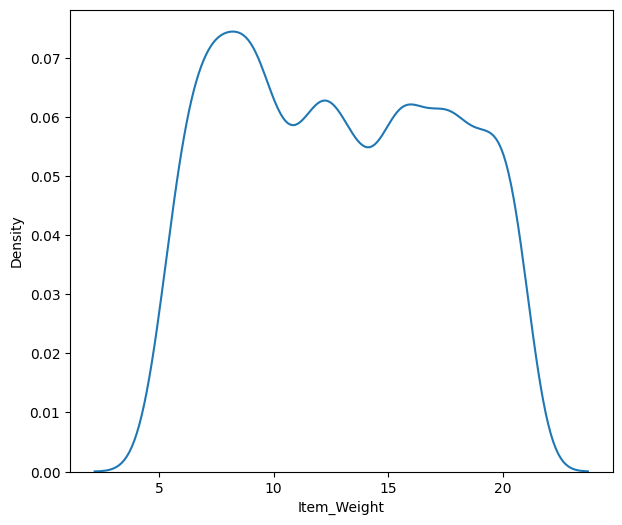

In [17]:
#KDE plot
sns.kdeplot(df_sales['Item_Weight'])
plt.show()

### Histogram of the entire dataset

<Figure size 1000x600 with 0 Axes>

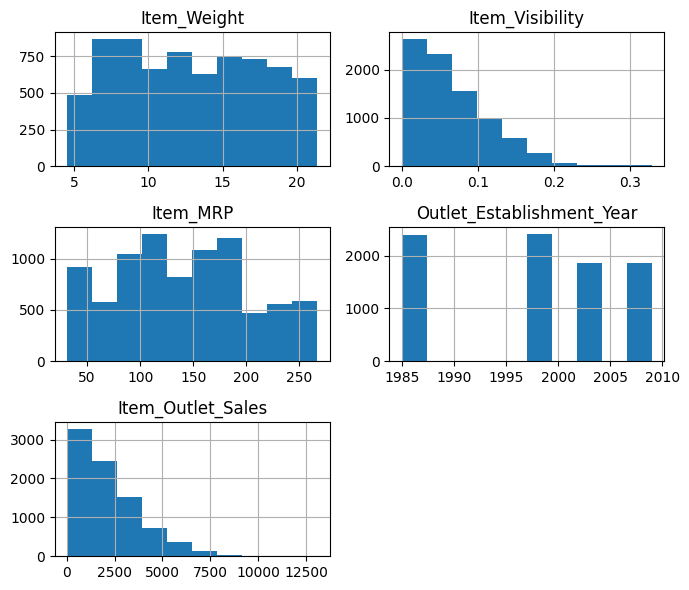

In [18]:
plt.figure(figsize=(10,6))
df_sales.hist()

plt.tight_layout()
plt.show()

In [19]:
me = df_sales['Item_Weight'].mean()
md = df_sales['Item_Weight'].median()
mo = df_sales['Item_Weight'].mode()[0]

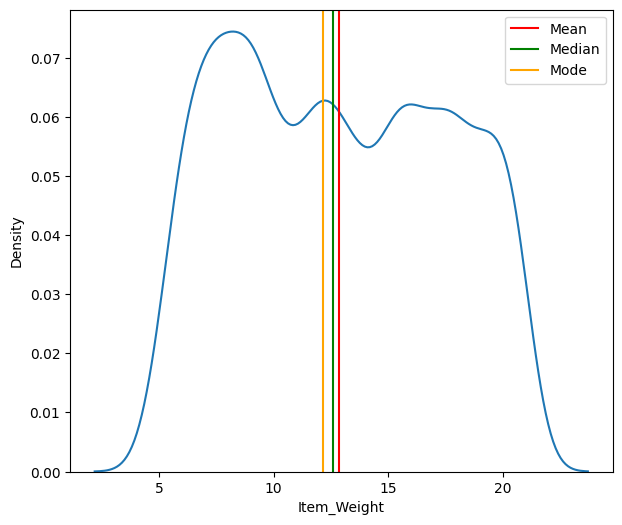

In [20]:
# Mean median and mode plotted on the kde plot 

sns.kdeplot(df_sales['Item_Weight']);
plt.axvline(me,label='Mean',color='Red');
plt.axvline(md,label='Median',color='Green');
plt.axvline(mo,label='Mode',color='Orange');

plt.legend()
plt.show()

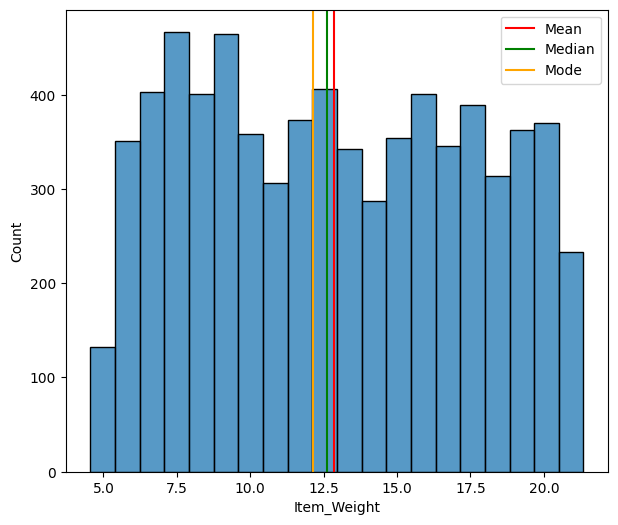

In [21]:
sns.histplot(df_sales['Item_Weight']);
plt.axvline(me,label='Mean',color='Red');
plt.axvline(md,label='Median',color='Green');
plt.axvline(mo,label='Mode',color='Orange');

plt.legend()
plt.show()

In [22]:
# Analysing the column item visibility

In [23]:
me_vis = df_sales['Item_Visibility'].mean()
md_vis = df_sales['Item_Visibility'].median()
mo_vis = df_sales['Item_Visibility'].mode()[0]

In [24]:
df_sales['Item_Visibility'].mode()

0    0.0
Name: Item_Visibility, dtype: float64

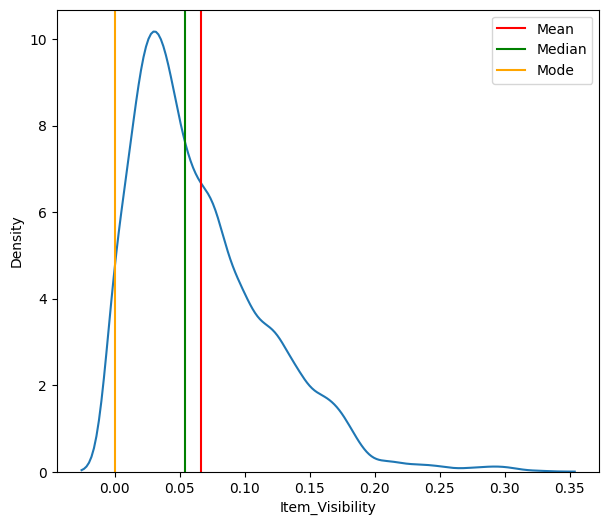

In [25]:
# Mean, median and mode on the KDE plot
sns.kdeplot(df_sales['Item_Visibility']);
plt.axvline(me_vis,label='Mean',color='Red');
plt.axvline(md_vis,label='Median',color='Green');
plt.axvline(mo_vis,label='Mode',color='Orange');

plt.legend()
plt.show()

#### Skewness and Kurtosis

In [26]:
df_sales['Item_Weight'].skew()

0.0824262091221237

The skewness of 0.0824262091221237 indicates that the distribution is slightly right-skewed. This means that the tail on the right side of the distribution is longer than the tail on the left side. However, the magnitude of the skewness is small, so the distribution is close to being symmetrical.

In [27]:
df_sales['Item_Weight'].kurt()

-1.2277664144376634

A kurtosis value of -1.2277664144376634 indicates that the distribution is platykurtic, meaning it has fewer outliers and is flatter than a normal distribution.

#### Analysing the item MRP

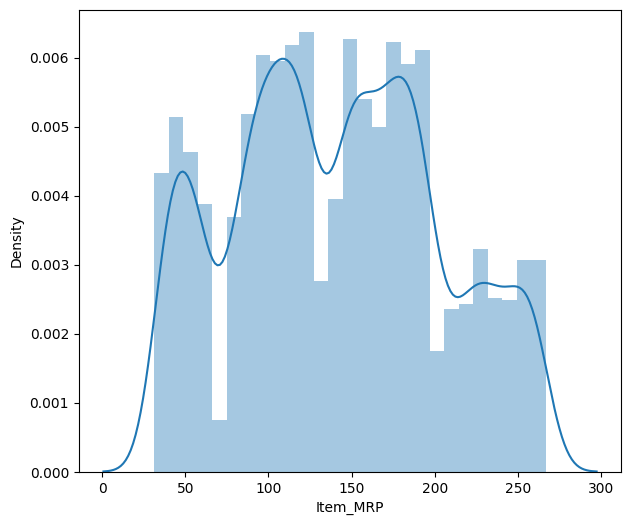

In [28]:
sns.distplot(df_sales.Item_MRP)
plt.show()

In [29]:
me_mrp = df_sales['Item_MRP'].mean()
md_mrp = df_sales['Item_MRP'].median()
mo_mrp = df_sales['Item_MRP'].mode()[0]

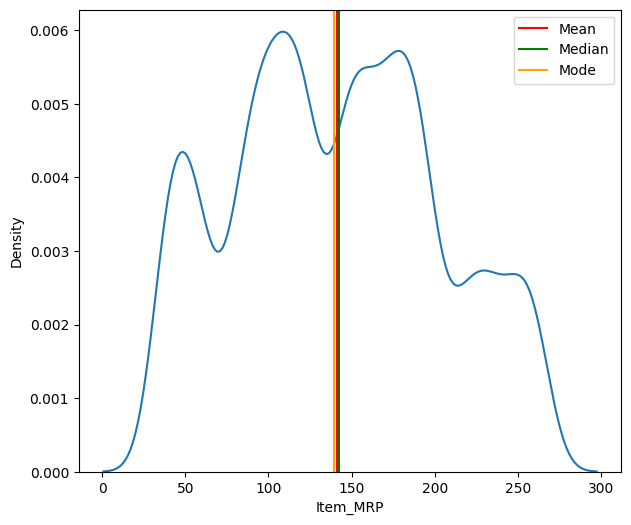

In [30]:
# Plotted mean, median and mode on the kde plot
sns.kdeplot(df_sales['Item_MRP']);
plt.axvline(me_mrp,label='Mean',color='Red');
plt.axvline(md_mrp,label='Median',color='Green');
plt.axvline(mo_mrp,label='Mode',color='Orange');

plt.legend()
plt.show()

In [31]:
df_sales['Item_MRP'].skew()

0.12738985338612047

Based on the skewness value of 0.12738985338612047, the distribution is slightly right-skewed. This means that there are more items with lower values than there are items with higher values, but the difference is not very large. 

In [32]:
df_sales['Item_MRP'].kurt()

-0.8879008549272447

Based on the kurtosis value of -0.8879008549272447, the distribution is considered moderately platykurtic. This means it has fewer outliers and is flatter than a normal distribution

#### Item outlet sales

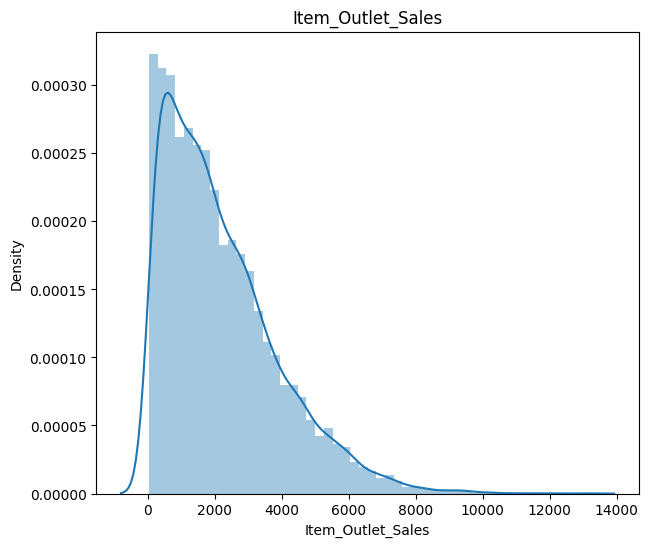

In [33]:
sns.distplot(df_sales['Item_Outlet_Sales'])
plt.title("Item_Outlet_Sales")
plt.show()

In [34]:
me_sales = df_sales['Item_Outlet_Sales'].mean()
md_sales = df_sales['Item_Outlet_Sales'].median()
mo_sales = df_sales['Item_Outlet_Sales'].mode()[0]

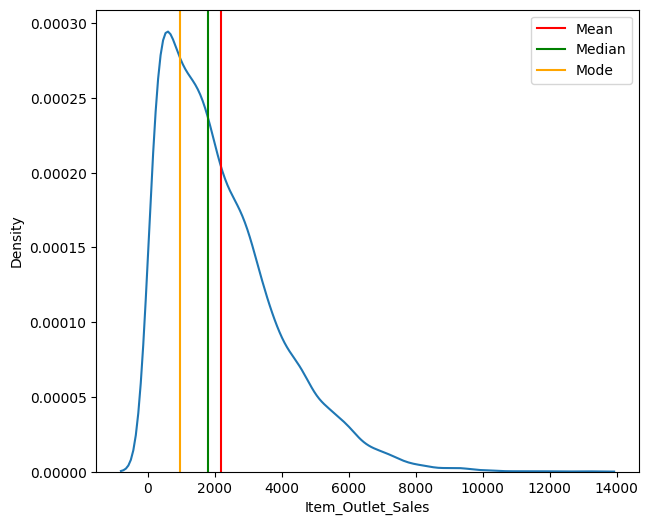

In [35]:
# mean,median and mode plotted on the kde plot
sns.kdeplot(df_sales['Item_Outlet_Sales']);
plt.axvline(me_sales,label='Mean',color='Red');
plt.axvline(md_sales,label='Median',color='Green');
plt.axvline(mo_sales,label='Mode',color='Orange');

plt.legend()
plt.show()

#### Skewness and Kurtosis of all the data points

In [36]:
# Finding the skewness of the sales
print("skewness for sales",df_sales['Item_Outlet_Sales'].skew())

skewness for sales 1.1775306028542796


The skewness value of 1.1775306028542796 indicates that the sales distribution is strongly skewed to the right. This means there are more sales with lower values than there are sales with higher values

In [37]:
# Kurtosis of the sales
print("Kurtosis of sales", df_sales['Item_Outlet_Sales'].kurt())

Kurtosis of sales 1.6158766814287264


The kurtosis value of 1.6158766814287264 indicates that the sales distribution is platykurtic. This means it has fewer outliers and is flatter than a normal distribution

#### Box plots and violin plot

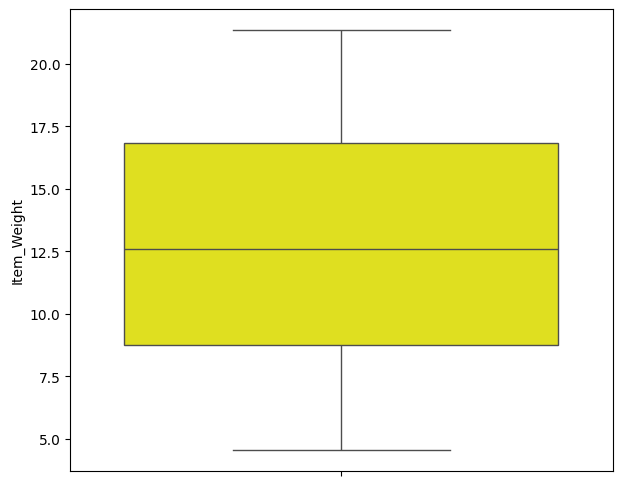

In [38]:
sns.boxplot(df_sales['Item_Weight'],color='yellow');

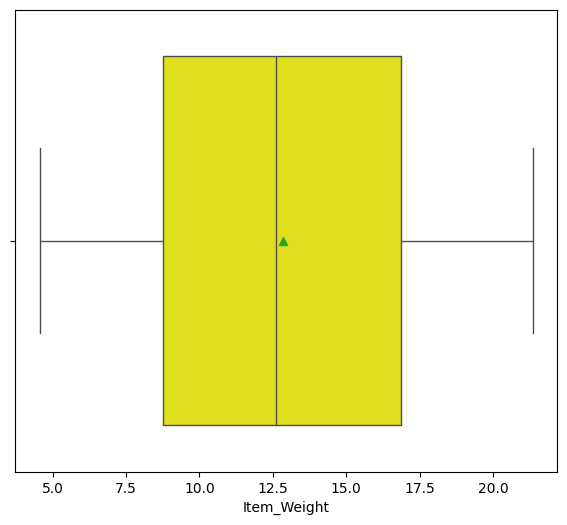

In [39]:
sns.boxplot(df_sales['Item_Weight'],color='yellow',showmeans=True,orient='h');

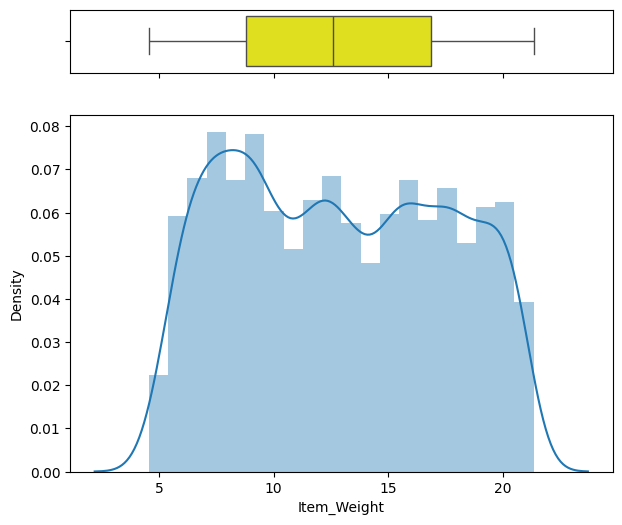

In [40]:
# lets look at the distribution of Item_Weight
area, (first_box, second_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df_sales['Item_Weight'], ax=first_box, orient='h',color='yellow')
sns.distplot(df_sales['Item_Weight'], ax=second_hist)
plt.show()

In [41]:
# The above figure shows us how the kde plot and the boxplot have been made together, 
# data with item weight 8 to 17 is approximately 50 % of the data

In [42]:
plt.rcParams['figure.figsize']=[10,3]

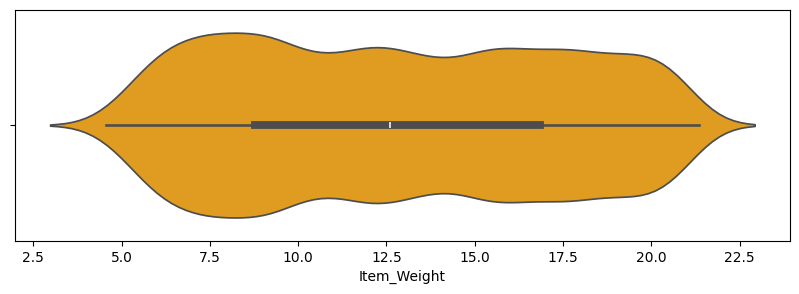

In [43]:
sns.violinplot(x='Item_Weight',data=df_sales,color='orange');
plt.show()

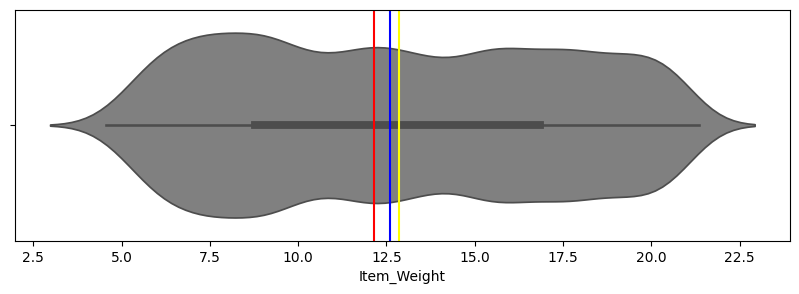

In [44]:
# Violin plot with the mean, median and mode
sns.violinplot(x='Item_Weight',data=df_sales,color='grey')
plt.axvline(df_sales['Item_Weight'].mean(),color='yellow')
plt.axvline(df_sales['Item_Weight'].median(),color='blue')
plt.axvline(df_sales['Item_Weight'].mode()[0],color='red')
plt.show()

<Axes: xlabel='Item_Weight'>

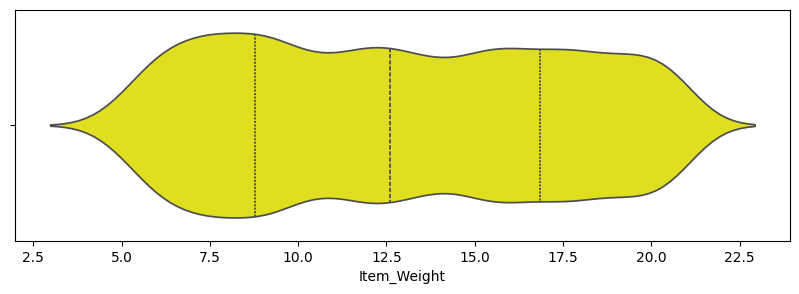

In [45]:
# Violin plot with the quartiles
sns.violinplot(x='Item_Weight',data=df_sales,color='yellow', inner='quartiles')

In [46]:
#### Range of the data

In [47]:
max(df_sales['Item_Outlet_Sales'])-min(df_sales['Item_Outlet_Sales'])

13053.674799999999

#### Calculating the variation

In [48]:
df_sales.var(numeric_only = True)

Item_Weight                  2.156169e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.876071e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

#### Calculating the standard deviation

In [49]:
df_sales.std(numeric_only = True)

Item_Weight                     4.643456
Item_Visibility                 0.051598
Item_MRP                       62.258099
Outlet_Establishment_Year       8.371760
Item_Outlet_Sales            1706.499616
dtype: float64

#### Coefficient of variation

In [50]:
df_sales.std(numeric_only = True) / df_sales.mean(numeric_only = True)

Item_Weight                  0.361144
Item_Visibility              0.780224
Item_MRP                     0.441550
Outlet_Establishment_Year    0.004190
Item_Outlet_Sales            0.782335
dtype: float64

In [51]:
# Relationship between the varaibles

In [52]:
df_sales.corr(numeric_only=True)

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027295   
Item_Visibility              -0.014048         1.000000 -0.001597   
Item_MRP                      0.027295        -0.001597  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005046   
Item_Outlet_Sales             0.014123        -0.128625  0.567555   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005046           0.567555  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

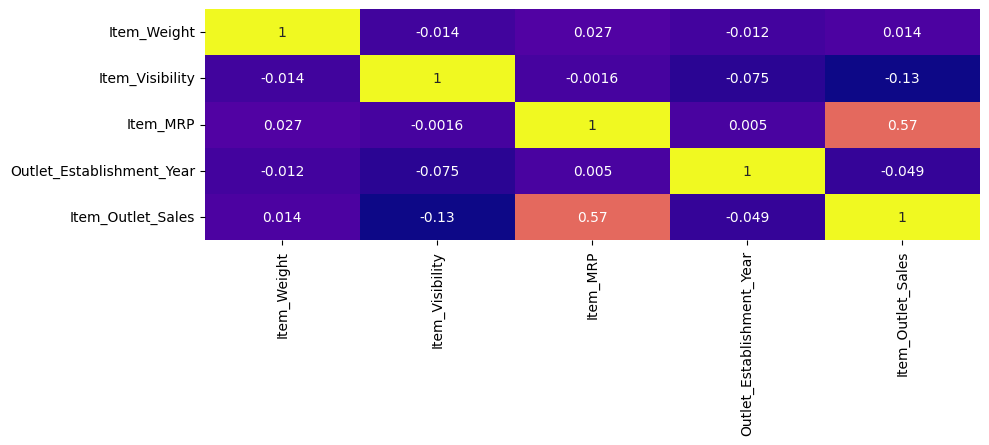

In [53]:
sns.heatmap(df_sales.corr(numeric_only=True),annot=True,cmap='plasma', cbar=False);

#### Univariate analysis of the categorical varaibles

In [54]:
df_sales.select_dtypes(include="object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [55]:
cat_cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

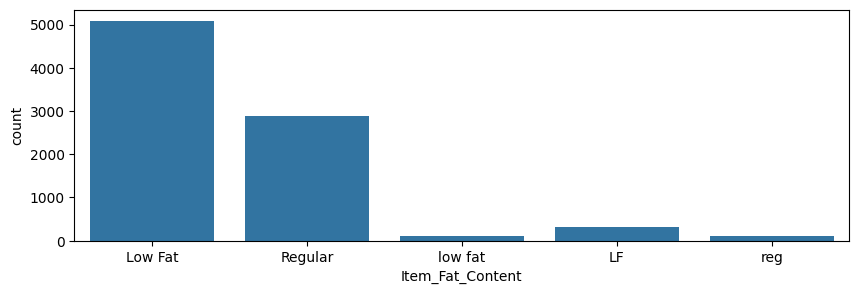

In [56]:
sns.countplot(x=df_sales['Item_Fat_Content'],data=df_sales);

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

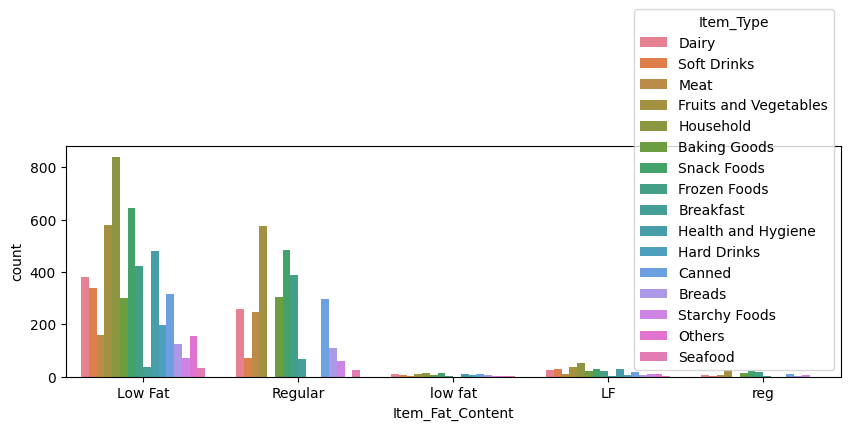

In [57]:
sns.countplot(x=df_sales['Item_Fat_Content'],data=df_sales, hue='Item_Type')

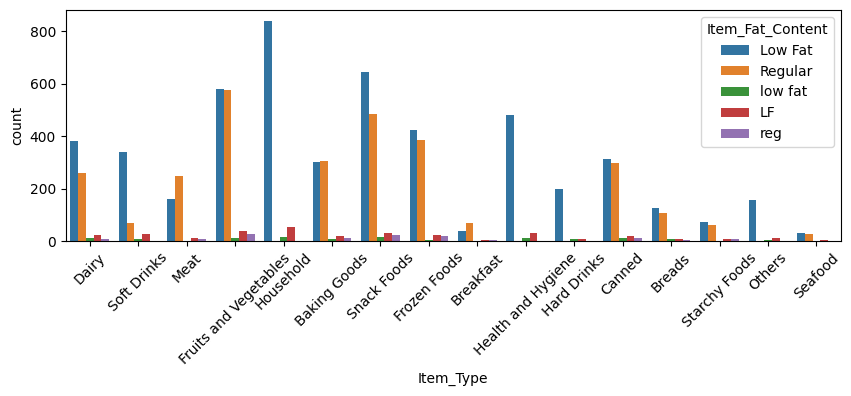

In [58]:
sns.countplot(x=df_sales['Item_Type'],data=df_sales, hue='Item_Fat_Content');
plt.xticks(rotation=45)
plt.show()

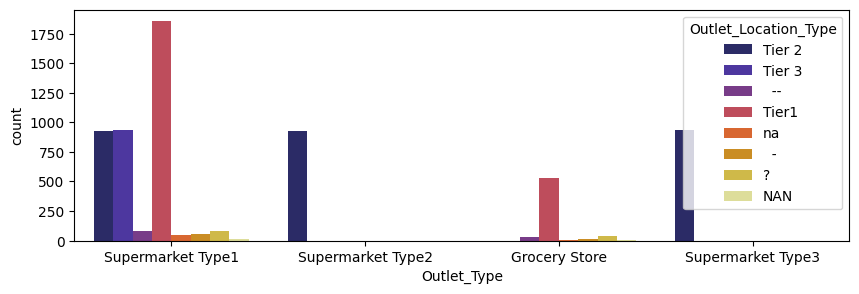

In [59]:

sns.countplot(x='Outlet_Type',hue='Outlet_Location_Type',data=df_sales,palette='CMRmap');
plt.show()

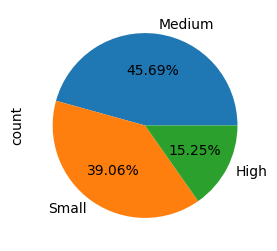

In [60]:
df_sales['Outlet_Size'].value_counts().plot(kind='pie',autopct='%.2f%%');

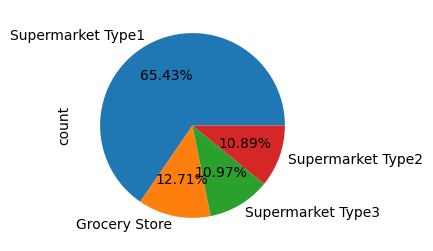

In [61]:
df_sales['Outlet_Type'].value_counts().plot(kind='pie',autopct='%.2f%%');

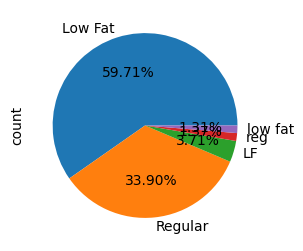

In [62]:
df_sales['Item_Fat_Content'].value_counts().plot(kind='pie',autopct='%.2f%%');

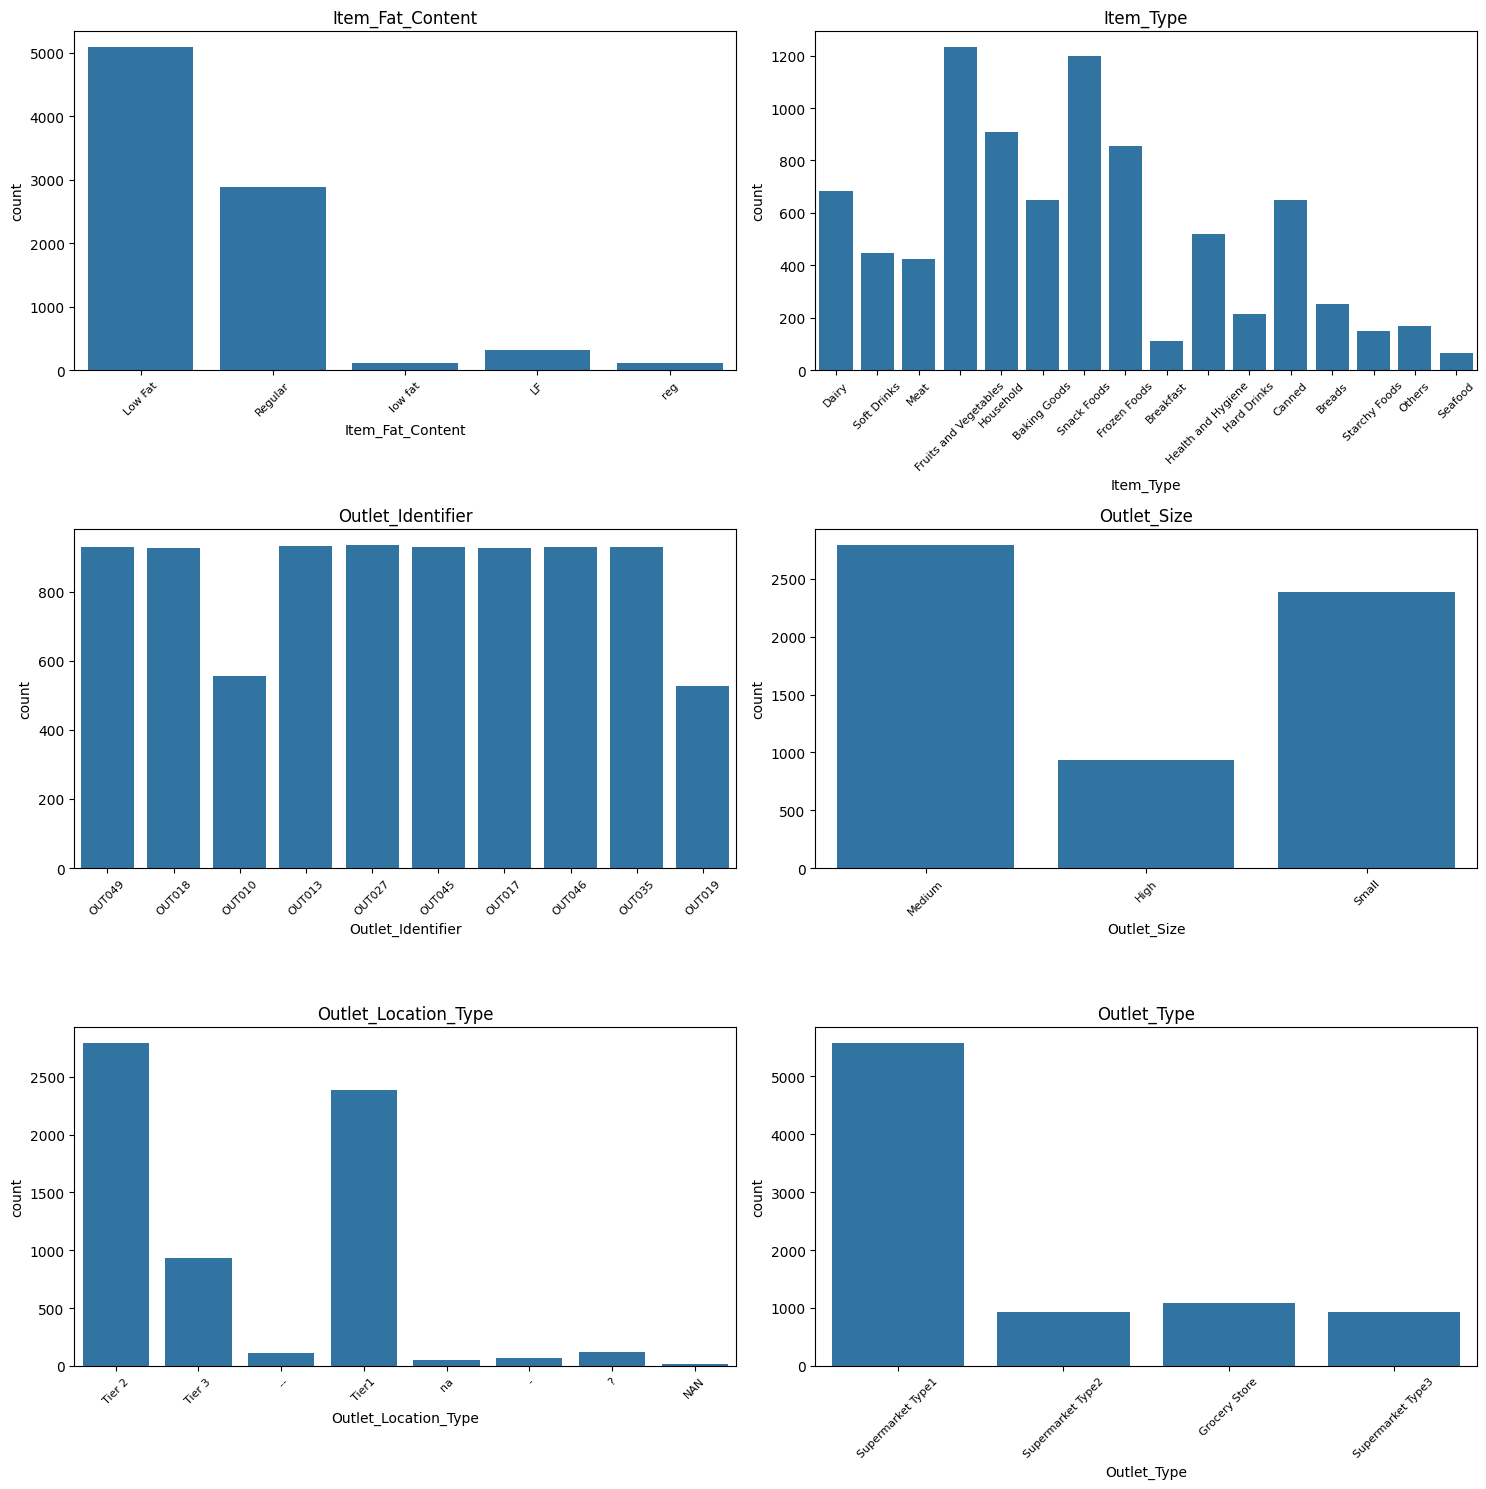

In [63]:
rcParams['figure.figsize'] = 15,15
j=1
for i in cat_cols:
  plt.subplot(3,2,j)
  sns.countplot(x=df_sales.loc[:,i])
  plt.title(i)
  j = j+1

  plt.xticks(rotation=45, fontsize=8)

plt.tight_layout()
plt.show()

1. The Item type like snack food, vegetables, fruits are top selling items.
2. Frequency of outlets is highest in tier 3 cities.
3. Low Fat products are sold the most.
4. Outlets of Medium size are more than the large and small sized outlet.

### Bivariate Analysis - Numerical to Numerical

In [64]:
df_sales.select_dtypes(include=np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [65]:
cols=['Item_Weight', 'Item_Visibility', 'Item_MRP']

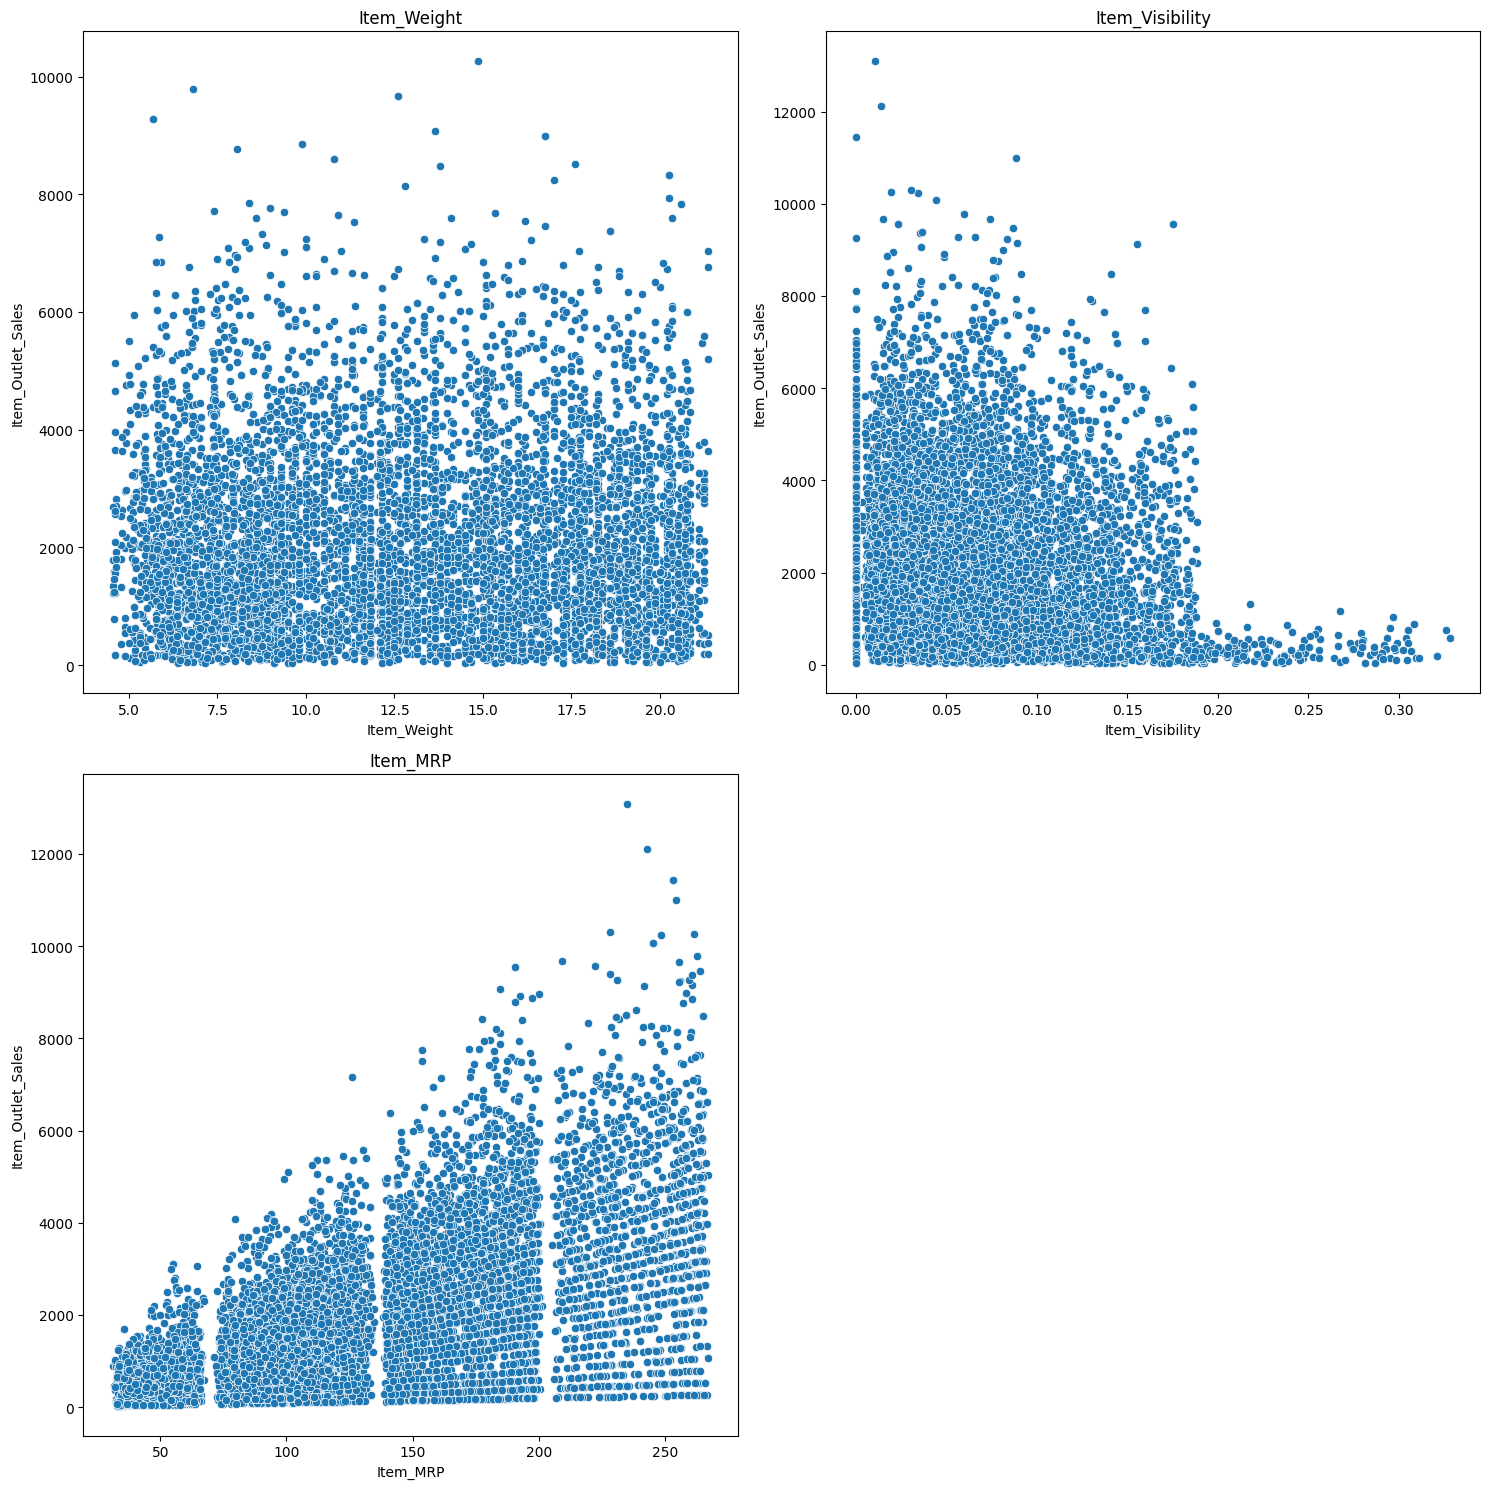

In [66]:
j=1
for i in cols:
  plt.subplot(2,2,j)
  sns.scatterplot(x=df_sales.loc[:,i], y = df_sales['Item_Outlet_Sales'])
  plt.title(i)
  j = j+1
plt.tight_layout()
plt.show()

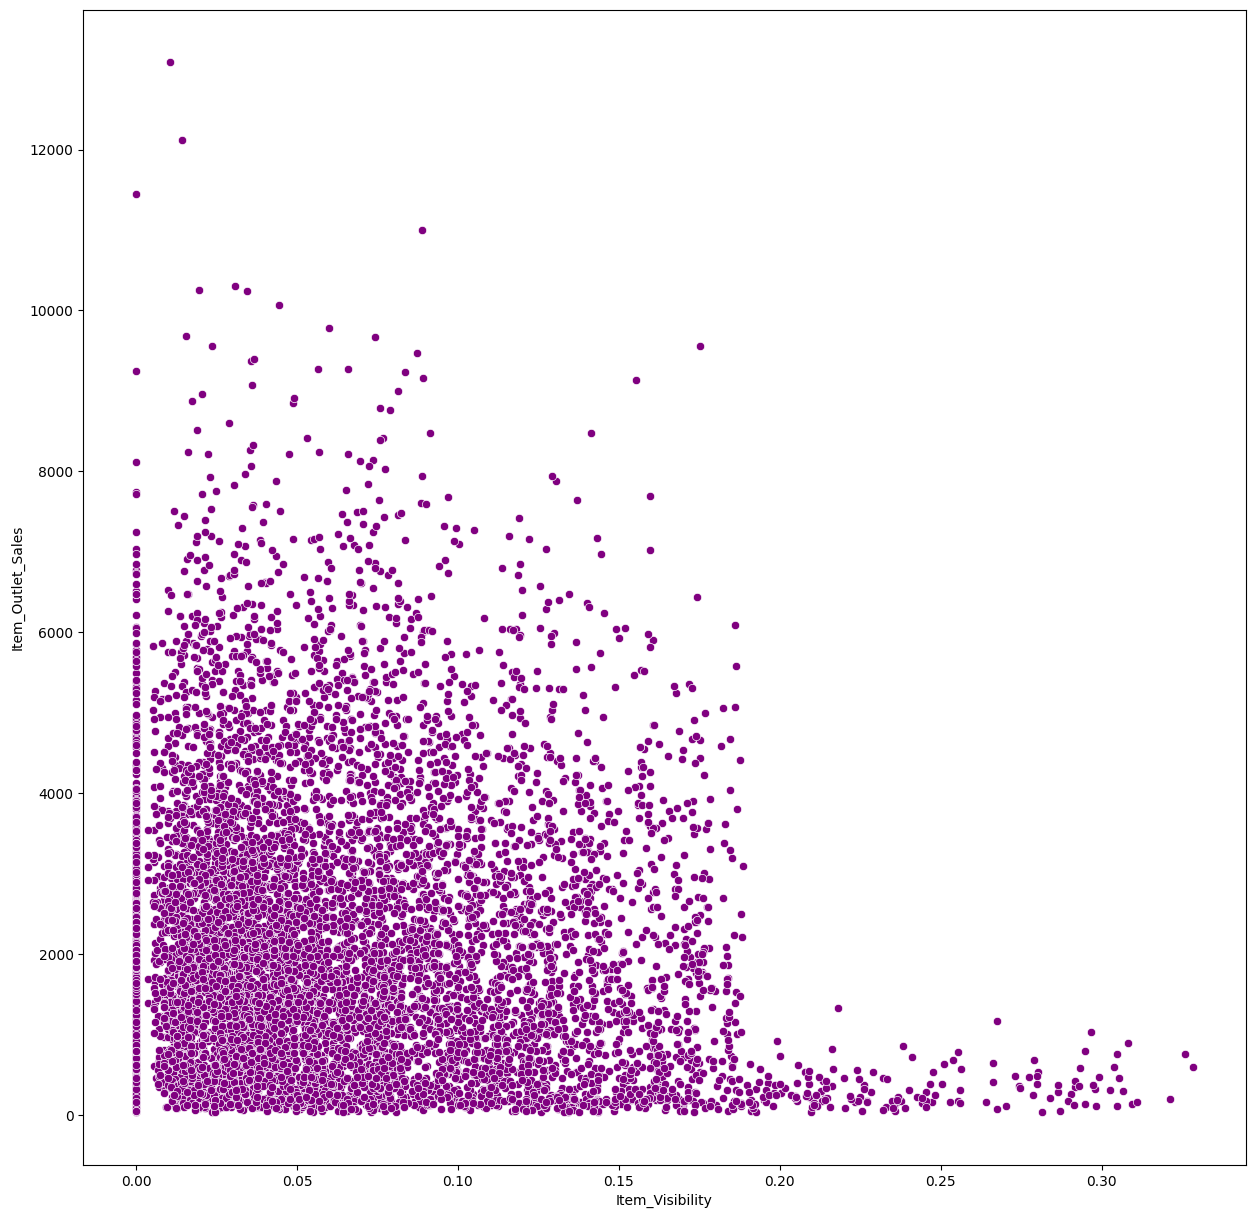

In [67]:
sns.scatterplot(x=df_sales['Item_Visibility'], y=df_sales['Item_Outlet_Sales'], color ='purple')
plt.show()


1. There is no specific pattern observed between Item weight and outlet sales.
2. There is very weak correlation between Item weight and outlet sales.
3. As the MRP increases, the outlet sales increases. This is a observed pattern.
4. The bigger products have higher visibility. High visibility have lower sales.
5. Smaller products have low visibility but has higher sales.
6. Item visibility with 0 has high sales-anamoly.

The above observations are showcasing some weirdness in the datset

In [68]:
# Making a pairplot

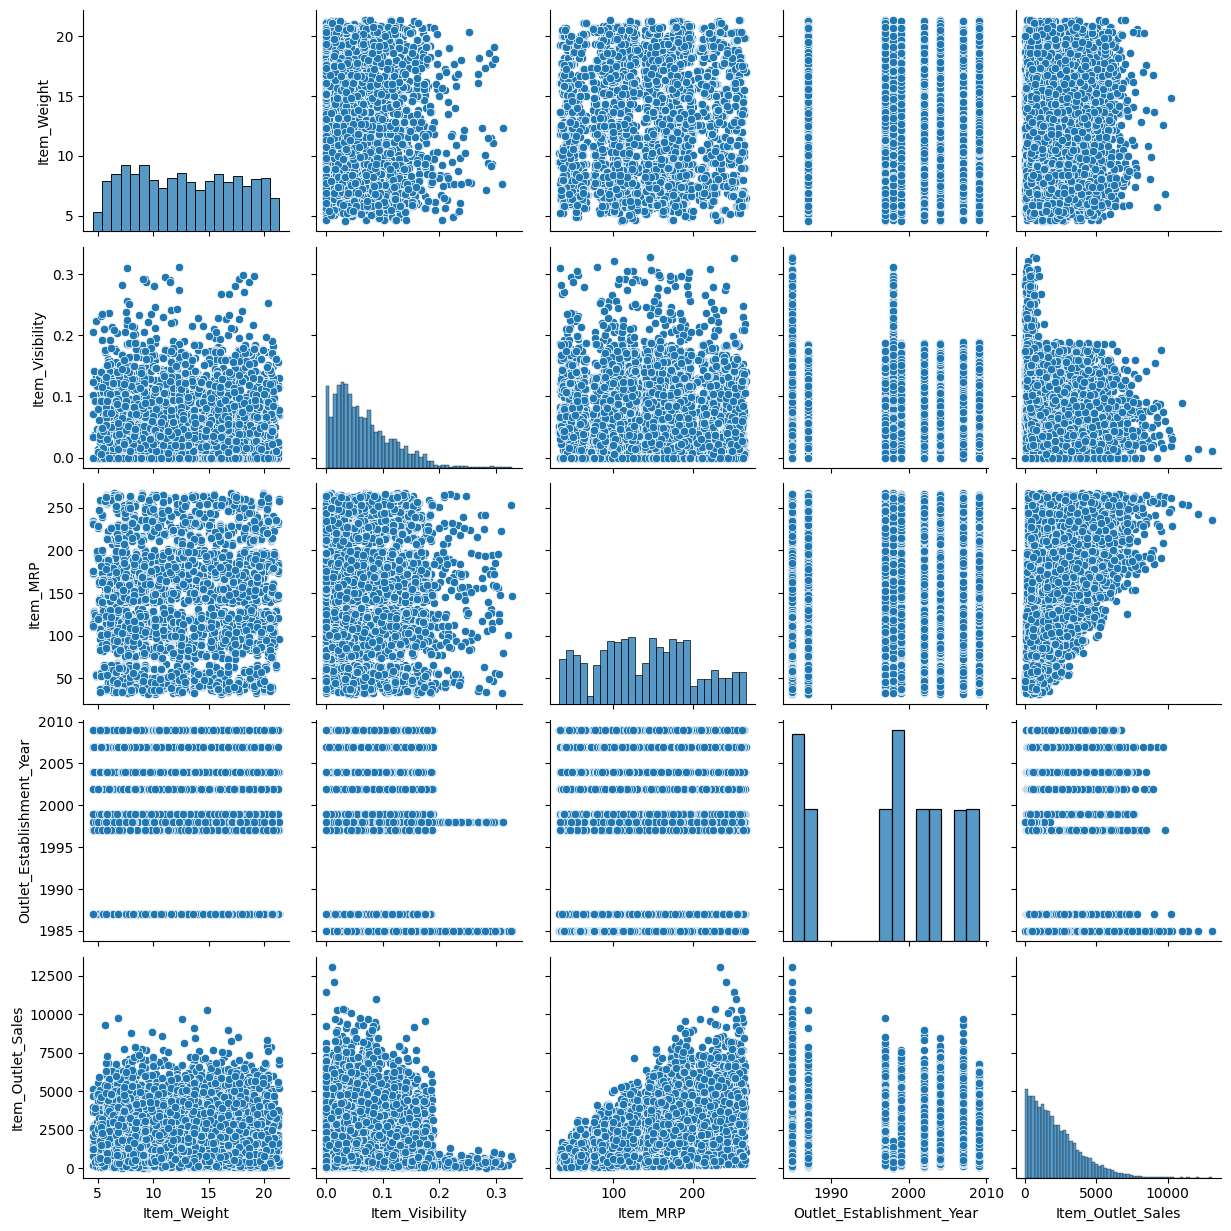

In [69]:
sns.pairplot(df_sales)

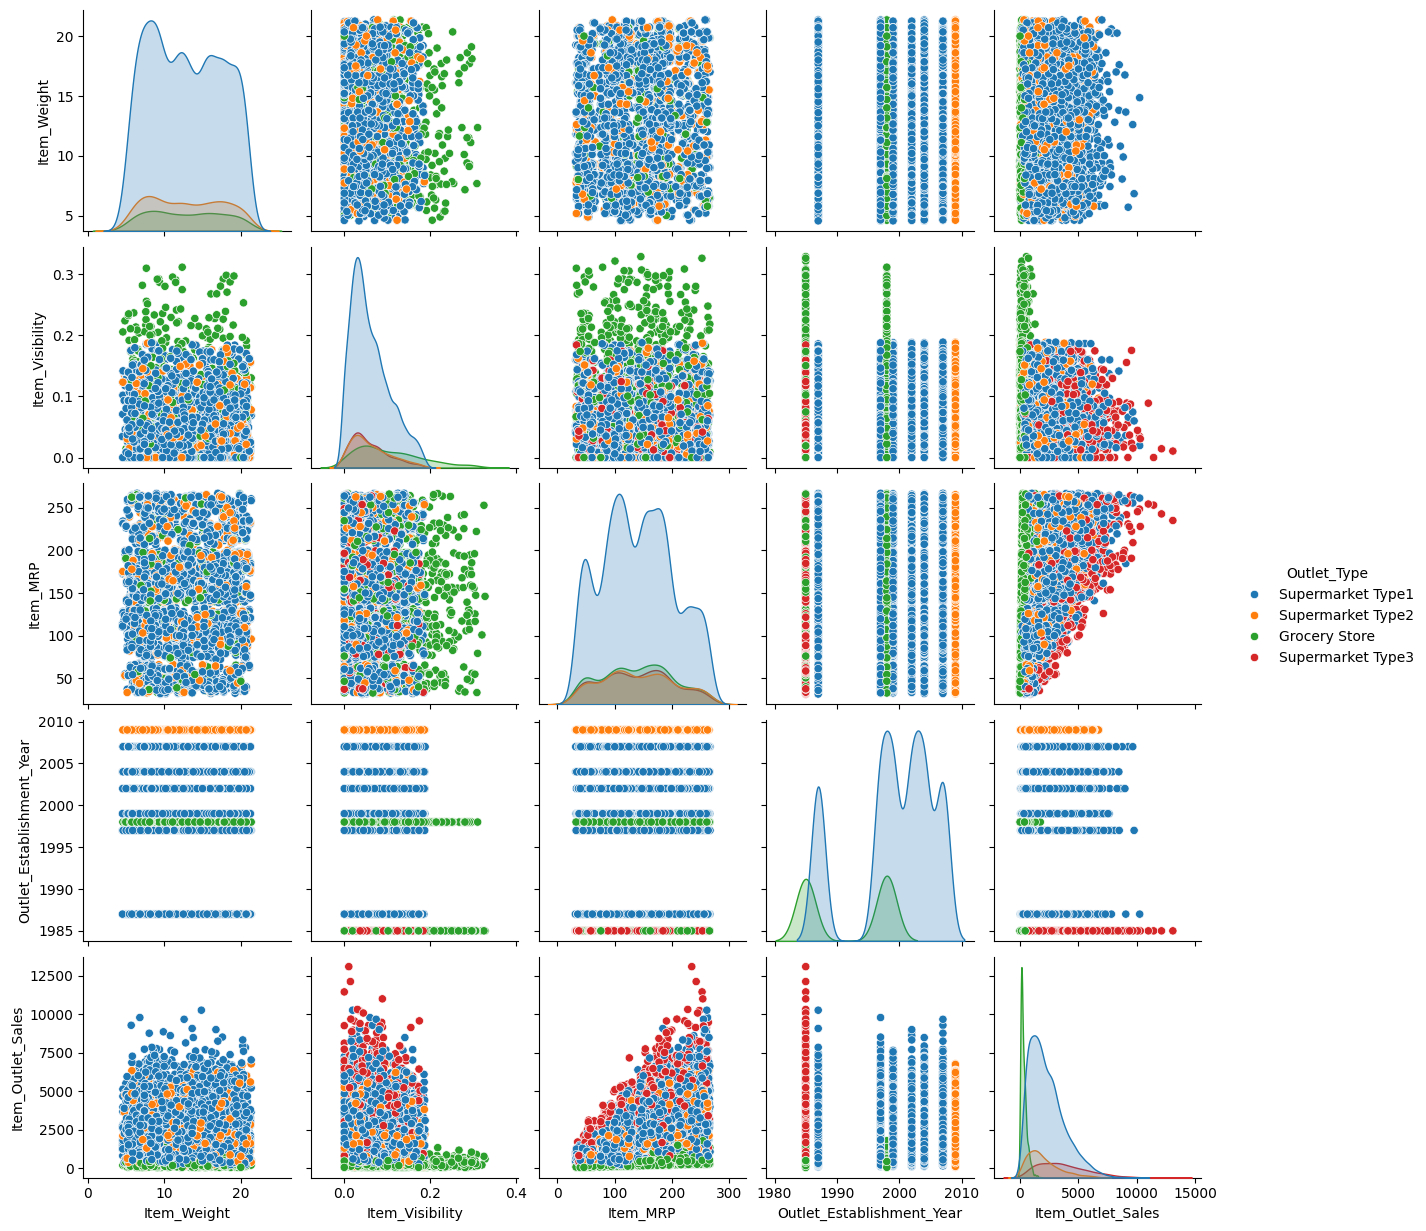

In [70]:
sns.pairplot(df_sales,hue='Outlet_Type');

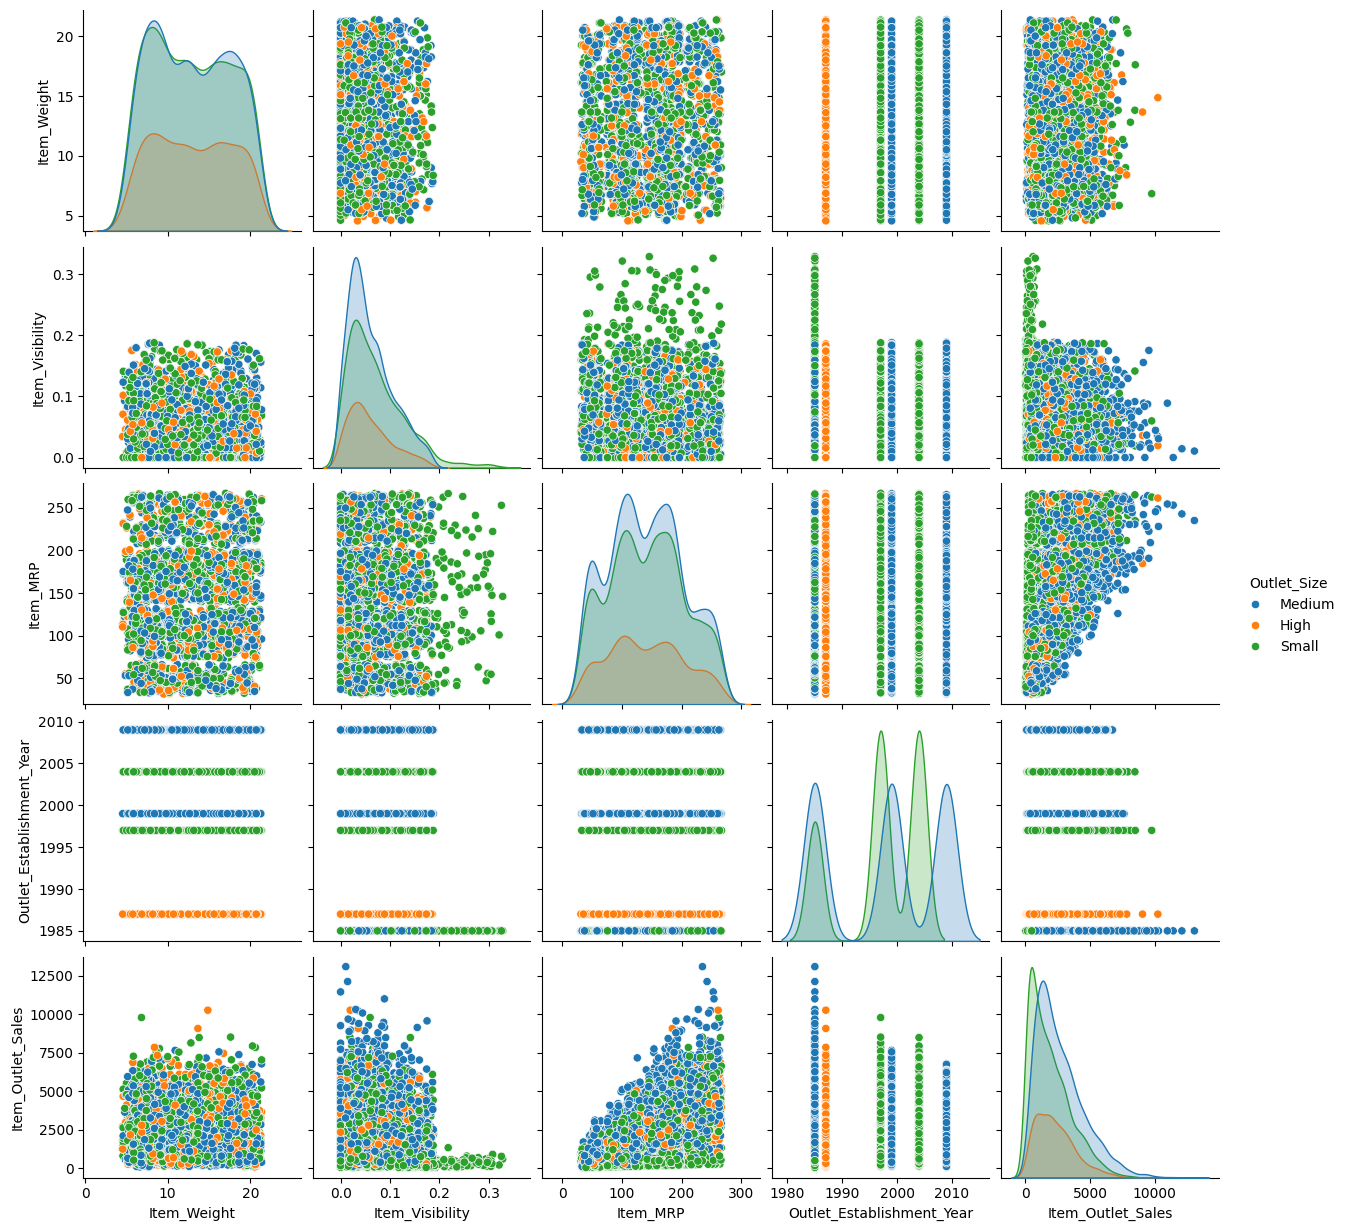

In [71]:
sns.pairplot(df_sales,hue='Outlet_Size');

### Bivariate analysis - Categorical to Numerical

In [72]:
cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

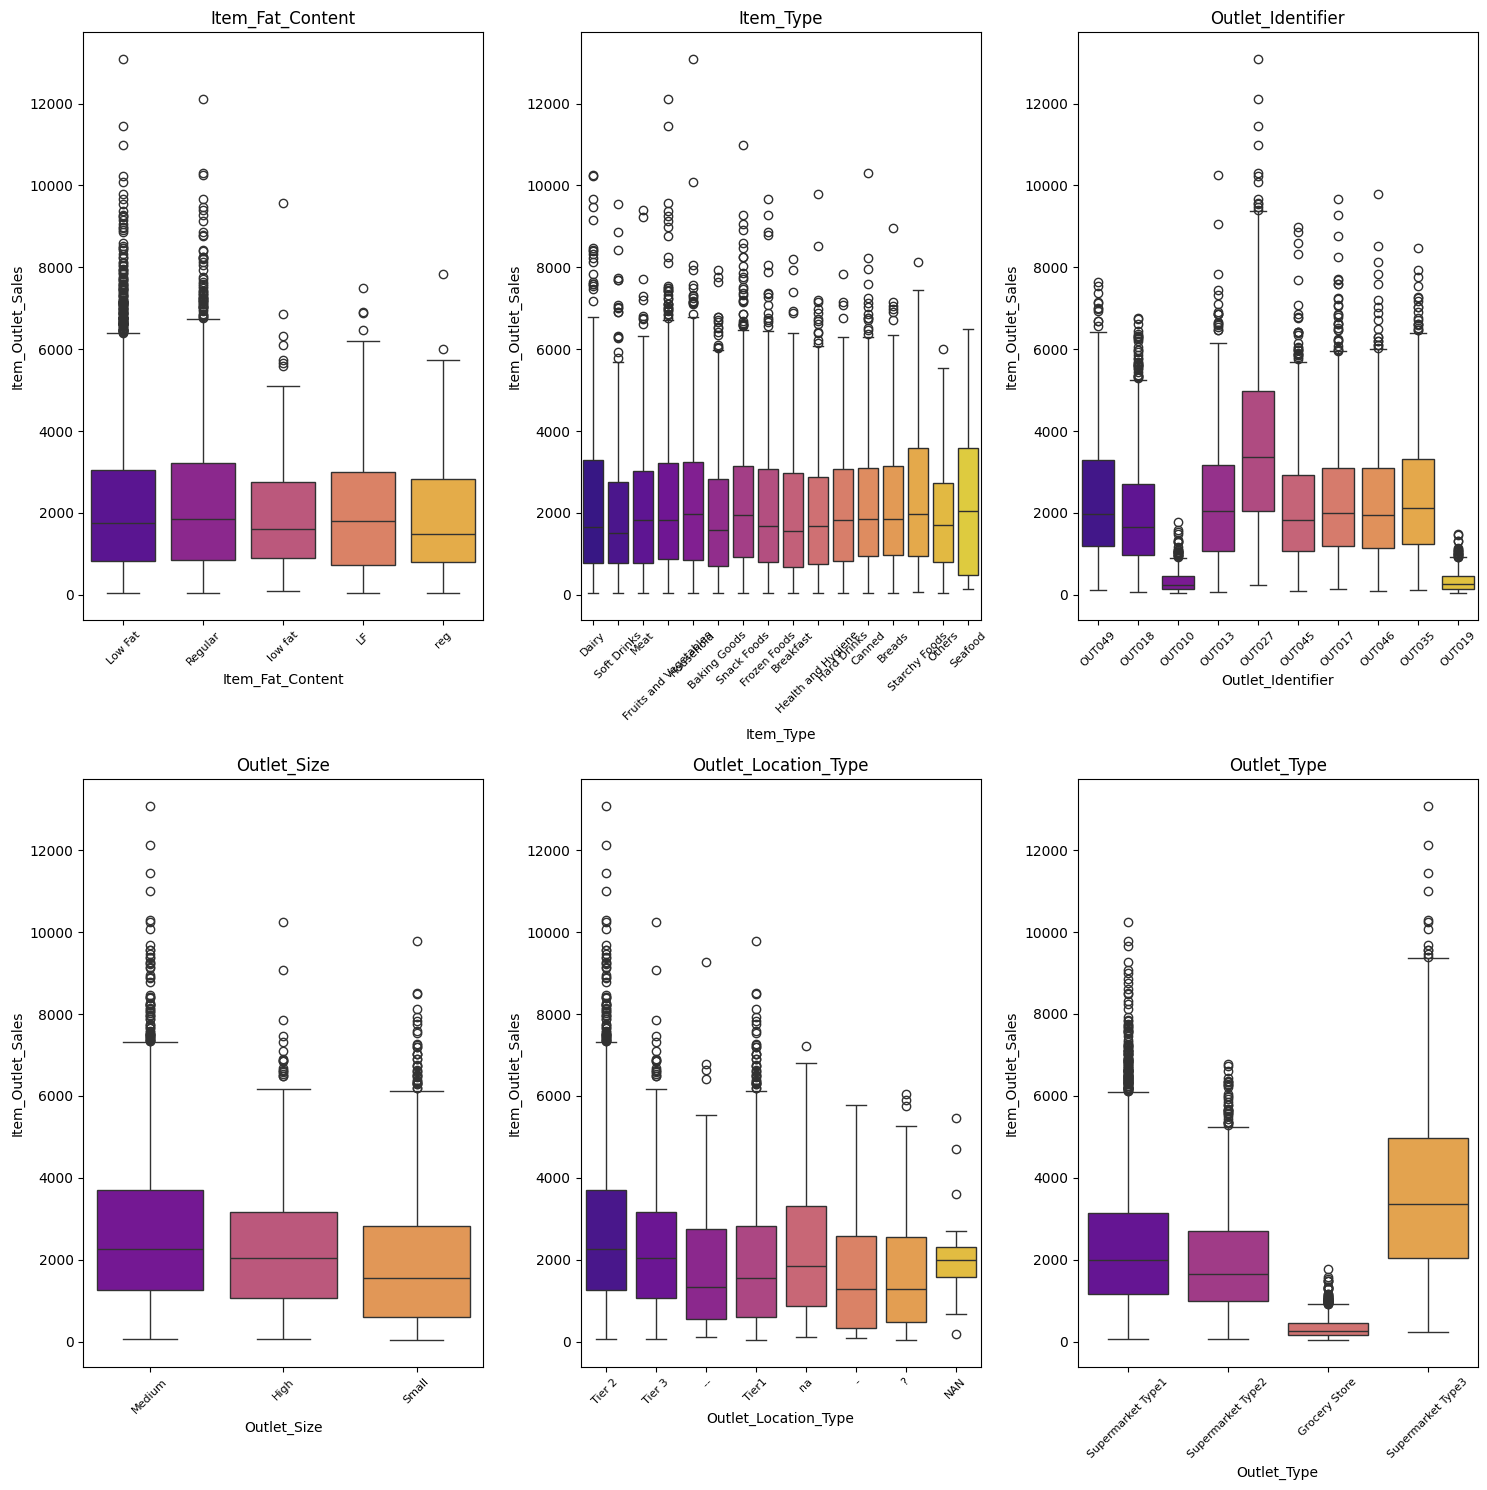

In [73]:
j=1
for i in cols:
  plt.subplot(2,3,j)
  sns.boxplot(x=df_sales.loc[:,i], y = df_sales['Item_Outlet_Sales'],palette = 'plasma')
  plt.title(i)
  j = j+1

  plt.xticks(rotation=45, fontsize=8)

plt.tight_layout()
plt.show()

1. Outlet 27 are the ones which are selling the highest.
2. Low fat items are selling more.
3. Household are selling the most.
4. All the plots shows outliers.
5. Outlet size of medium are greater in number.
6. Tier 3 cities have the highest sales.
7. Super market type 3 has the highest sales.

<Axes: xlabel='Item_MRP'>

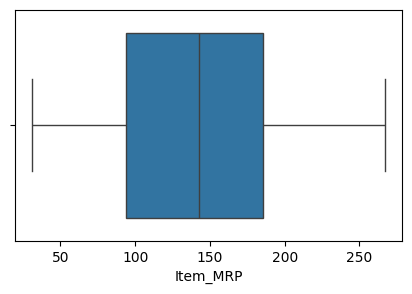

In [74]:
rcParams['figure.figsize'] = 5,3
sns.boxplot(x=df_sales['Item_MRP'])

<Axes: xlabel='Item_Outlet_Sales'>

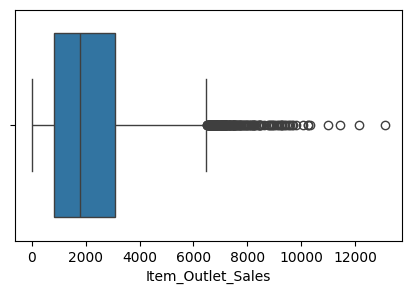

In [75]:
sns.boxplot(x=df_sales['Item_Outlet_Sales'])

In [76]:
### Calculating the quartiles of the Iten_outlet_sales

In [77]:
print("1st quantile -q1",df_sales['Item_Outlet_Sales'].quantile(0.25))
print("2nd quantile -q2",df_sales['Item_Outlet_Sales'].quantile(0.50))
print("3rd quantile -q3",df_sales['Item_Outlet_Sales'].quantile(0.75))


1st quantile -q1 834.2474
2nd quantile -q2 1794.331
3rd quantile -q3 3101.2964


In [78]:
q1 = df_sales['Item_Outlet_Sales'].quantile(0.25)
q3 = df_sales['Item_Outlet_Sales'].quantile(0.75)

print("Inter Quantile Range- iqr", q3-q1)

Inter Quantile Range- iqr 2267.049


In [79]:
df_sales.quantile(0.25, numeric_only=True)

Item_Weight                     8.773750
Item_Visibility                 0.026989
Item_MRP                       93.800000
Outlet_Establishment_Year    1987.000000
Item_Outlet_Sales             834.247400
Name: 0.25, dtype: float64

1. Outliers are defined as per the standards. Data points above q3 +1.5* iqr and Data points below q1-1.5* iqr are considered as outliers.
2. Quantile function works for numerical variables only.


In [80]:
# Analysing the Iten_Fat_Content column
df_sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [81]:
# Replacing the LF,reg and low fat values with Low Fat , Regular 
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('LF','Low Fat').replace('reg','Regular').replace('low fat','Low Fat')

In [82]:
df_sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

### Checking for null values

In [83]:
df_sales.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Outlet_Location_Type         2050
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The missing values are there in three columns in which Item Weight is Numerical and Outlet size and outlet location size is categorical columns

#### Missing Value Treatment for Numerical Variable

1. Numerical - Item Weight
2. Categorical - Outlet Size, Outlet_Location_Size

#### Imputing the missing values by finding the relationship between the columns 

In [84]:
#Case 1

In [85]:
df_sales.groupby("Item_Fat_Content")['Item_Weight'].describe()

count       mean       std    min    25%    50%   75%  \
Item_Fat_Content                                                           
Low Fat           4566.0  12.937387  4.653787  4.590  8.775  12.65  17.1   
Regular           2494.0  12.711654  4.621851  4.555  8.770  12.50  16.7   

                    max  
Item_Fat_Content         
Low Fat           21.35  
Regular           21.20

In [86]:
# Case 2

In [87]:
df_sales.groupby("Item_Type")['Item_Weight'].describe()

count       mean       std    min       25%     50%  \
Item_Type                                                                     
Baking Goods            536.0  12.277108  4.773622  4.880   8.23500  11.650   
Breads                  204.0  11.346936  4.440540  4.635   7.12875  10.600   
Breakfast                89.0  12.768202  5.038131  6.425   8.06000  10.695   
Canned                  539.0  12.305705  4.586564  4.615   8.11500  12.150   
Dairy                   566.0  13.426069  4.686532  4.805   9.27750  13.350   
Frozen Foods            718.0  12.867061  4.507383  4.555   8.93500  12.850   
Fruits and Vegetables  1019.0  13.224769  4.575275  5.460   9.19500  13.100   
Hard Drinks             183.0  11.400328  4.239144  4.610   8.26000  10.100   
Health and Hygiene      430.0  13.142314  4.512313  5.175   9.69500  12.150   
Household               759.0  13.384736  4.998845  5.030   8.69500  13.150   
Meat                    337.0  12.817344  4.670812  5.150   9.30000  12.350   
Others                  137.0  13.853285  4.225534  5.500  10.65000  14.500   
Seafood                  51.0  12.552843  5.473830  5.365   7.42000  11.650   
Snack Foods             988.0  12.987880  4.531256  5.095   9.19500  13.150   
Soft Drinks             374.0  11.847460  4.403699  4.590   8.26000  11.800   
Starchy Foods           130.0  13.690731  4.010061  6.695  11.50000  13.175   

                         75%    max  
Item_Type                            
Baking Goods           15.75  20.85  
Breads                 14.85  20.85  
Breakfast              17.25  21.10  
Canned                 16.25  21.35  
Dairy                  17.60  20.70  
Frozen Foods           17.00  20.85  
Fruits and Vegetables  17.10  21.35  
Hard Drinks            14.85  19.70  
Health and Hygiene     17.60  21.25  
Household              18.35  21.25  
Meat                   17.20  21.25  
Others                 17.75  20.50  
Seafood                17.75  20.75  
Snack Foods            16.85  21.25  
Soft Drinks            15.35  20.75  
Starchy Foods          16.70  21.20

In [88]:
# Case 3

In [89]:
df_sales.groupby("Item_Identifier")['Item_Weight'].describe()

count    mean           std     min     25%     50%     75%  \
Item_Identifier                                                                
DRA12              6.0  11.600  0.000000e+00  11.600  11.600  11.600  11.600   
DRA24              5.0  19.350  0.000000e+00  19.350  19.350  19.350  19.350   
DRA59              6.0   8.270  1.945901e-15   8.270   8.270   8.270   8.270   
DRB01              2.0   7.390  0.000000e+00   7.390   7.390   7.390   7.390   
DRB13              5.0   6.115  0.000000e+00   6.115   6.115   6.115   6.115   
...                ...     ...           ...     ...     ...     ...     ...   
NCZ30              6.0   6.590  9.729507e-16   6.590   6.590   6.590   6.590   
NCZ41              5.0  19.850  0.000000e+00  19.850  19.850  19.850  19.850   
NCZ42              5.0  10.500  0.000000e+00  10.500  10.500  10.500  10.500   
NCZ53              4.0   9.600  0.000000e+00   9.600   9.600   9.600   9.600   
NCZ54              5.0  14.650  0.000000e+00  14.650  14.650  14.650  14.650   

                    max  
Item_Identifier          
DRA12            11.600  
DRA24            19.350  
DRA59             8.270  
DRB01             7.390  
DRB13             6.115  
...                 ...  
NCZ30             6.590  
NCZ41            19.850  
NCZ42            10.500  
NCZ53             9.600  
NCZ54            14.650  

[1559 rows x 8 columns]

In [90]:
df_sales[['Item_Identifier','Item_Weight','Item_Type']][df_sales.Item_Identifier=='FDA15']

Item_Identifier  Item_Weight Item_Type
0              FDA15          9.3     Dairy
831            FDA15          9.3     Dairy
2599           FDA15          9.3     Dairy
2643           FDA15          9.3     Dairy
4874           FDA15          9.3     Dairy
5413           FDA15          9.3     Dairy
6696           FDA15          NaN     Dairy
7543           FDA15          9.3     Dairy

In [91]:
df_sales[['Item_Identifier','Item_Weight','Item_Type']][df_sales.Item_Identifier=='NCZ05']

Item_Identifier  Item_Weight           Item_Type
1208           NCZ05        8.485  Health and Hygiene
3244           NCZ05        8.485  Health and Hygiene
7873           NCZ05          NaN  Health and Hygiene

In [92]:
df_sales[['Item_Identifier','Item_Weight','Item_Type']][df_sales.Item_Identifier=='FDX07']

Item_Identifier  Item_Weight              Item_Type
3              FDX07         19.2  Fruits and Vegetables
1491           FDX07         19.2  Fruits and Vegetables
2459           FDX07         19.2  Fruits and Vegetables
3089           FDX07         19.2  Fruits and Vegetables
5906           FDX07         19.2  Fruits and Vegetables
7735           FDX07          NaN  Fruits and Vegetables

In [93]:
df_sales[['Item_Identifier','Item_Weight','Item_Type']][df_sales.Item_Identifier=='DRA24']

Item_Identifier  Item_Weight    Item_Type
1148           DRA24        19.35  Soft Drinks
2879           DRA24          NaN  Soft Drinks
4130           DRA24        19.35  Soft Drinks
4416           DRA24          NaN  Soft Drinks
4900           DRA24        19.35  Soft Drinks
6863           DRA24        19.35  Soft Drinks
8195           DRA24        19.35  Soft Drinks

In [94]:
# We can see that the values of weight is same for each of the Item_Identifier 
# so we would go ahead and impute it using that

#### Imputing the missing values

In [95]:
df_sales['Item_Weight'] = df_sales.groupby('Item_Identifier')['Item_Weight'].fillna('Item_Weight')

In [96]:
df_sales.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Outlet_Location_Type         2050
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [97]:
df_sales[df_sales['Item_Weight'].isnull()]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []

In [98]:
df_sales['Item_Weight'] = pd.to_numeric(df_sales['Item_Weight'], errors='coerce')
df_sales['Item_Weight'] = df_sales.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.median()))

In [99]:
df_sales.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Outlet_Location_Type         2050
Item_Weight                     4
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [100]:
df_sales.loc[df_sales['Item_Weight'].isnull()]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
927            FDN52          NaN          Regular         0.130933   
1922           FDK57          NaN          Low Fat         0.079904   
4187           FDE52          NaN          Regular         0.029742   
5022           FDQ60          NaN          Regular         0.191501   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
927   Frozen Foods      86.9            OUT027                       1985   
1922   Snack Foods     120.0            OUT027                       1985   
4187         Dairy      89.0            OUT027                       1985   
5022  Baking Goods     121.2            OUT019                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
927       Medium               Tier 2  Supermarket Type3          1569.9564  
1922      Medium               Tier 2  Supermarket Type3          4434.2280  
4187      Medium               Tier 2  Supermarket Type3          3453.5046  
5022       Small                Tier1      Grocery Store           120.5098

1. The values are null as these are the unique Item_Identifier where we do not have entries. For every Item_Identifier, there were multiple entries. However, Item_Identifier has only one entry with null value for Item_Weight.
2. We need to check Item_Identifier with Item_Fat_Content and look for pattern.

In [101]:
df_sales.loc[df_sales['Item_Type']=="Frozen Foods",]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8              FDH17       16.200          Regular         0.016687   
9              FDU28       19.200          Regular         0.094450   
24             FDR28       13.850          Regular         0.025896   
51             FDM40       10.195          Low Fat         0.159804   
63             FDY40       15.500          Regular         0.150286   
...              ...          ...              ...              ...   
8477           FDC05       13.100          Regular         0.099343   
8482           FDZ28       20.000          Regular         0.051702   
8507           FDN28        5.880          Regular         0.030242   
8511           FDF05       17.500          Low Fat         0.026980   
8517           FDF53       20.750          Regular         0.083607   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
8     Frozen Foods      97.0            OUT045                       2002   
9     Frozen Foods     187.8            OUT017                       2007   
24    Frozen Foods     165.0            OUT046                       1997   
51    Frozen Foods     141.5            OUT013                       1987   
63    Frozen Foods      51.1            OUT019                       1985   
...            ...       ...               ...                        ...   
8477  Frozen Foods     198.2            OUT017                       2007   
8482  Frozen Foods     125.9            OUT018                       2009   
8507  Frozen Foods     101.8            OUT035                       2004   
8511  Frozen Foods     262.6            OUT018                       2009   
8517  Frozen Foods     178.8            OUT046                       1997   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
8            NaN                  NaN  Supermarket Type1          1076.5986  
9            NaN                   --  Supermarket Type1          4710.5350  
24         Small                Tier1  Supermarket Type1          4078.0250  
51          High               Tier 3  Supermarket Type1           850.8924  
63         Small                Tier1      Grocery Store           147.8076  
...          ...                  ...                ...                ...  
8477         NaN                  NaN  Supermarket Type1          1970.7680  
8482      Medium               Tier 2  Supermarket Type2           763.0068  
8507       Small                Tier1  Supermarket Type1           515.9950  
8511      Medium               Tier 2  Supermarket Type2          4207.8560  
8517       Small                Tier1  Supermarket Type1          3608.6360  

[856 rows x 12 columns]

In [102]:
#It will return the list of all iterm weight
df_sales.loc[df_sales['Item_Type']=="Frozen Foods","Item_Weight"]

8       16.200
9       19.200
24      13.850
51      10.195
63      15.500
         ...  
8477    13.100
8482    20.000
8507     5.880
8511    17.500
8517    20.750
Name: Item_Weight, Length: 856, dtype: float64

In [103]:
# .loc[ condition , Name of column]. apply the function
df_sales.loc[df_sales['Item_Type']=="Frozen Foods","Item_Weight"].median()

12.85

In [104]:
# Take the Index number where it is missing and replace that column with median value
df_sales.loc[927,'Item_Weight']=12.85

In [105]:
#### Imputing the other missing values

In [106]:
df_sales.loc[df_sales['Item_Type']=="Snack Foods","Item_Weight"].median()

13.15

In [107]:
df_sales.loc[1922,'Item_Weight']=13.15

In [108]:
df_sales.loc[df_sales['Item_Type']=="Dairy","Item_Weight"].median()

13.35

In [109]:
df_sales.loc[4187,'Item_Weight']=13.35

In [110]:
df_sales.loc[df_sales['Item_Type']=="Baking Goods","Item_Weight"].median()

11.65

In [111]:
df_sales.loc[5022,'Item_Weight']=11.65

In [112]:
df_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [113]:
# Imputing the missing values for Categorical columns

In [114]:
df_sales['Outlet_Size'].isnull().sum()

2410

In [115]:
# Case 1 
df_sales.groupby("Item_Fat_Content")['Outlet_Size'].describe()

count unique     top  freq
Item_Fat_Content                           
Low Fat           3955      3  Medium  1799
Regular           2158      3  Medium   994

In [116]:
# Case 2

In [117]:
df_sales.groupby("Outlet_Type")['Outlet_Size'].describe()

count unique     top  freq
Outlet_Type                                 
Grocery Store       528      1   Small   528
Supermarket Type1  3722      3   Small  1860
Supermarket Type2   928      1  Medium   928
Supermarket Type3   935      1  Medium   935

In [118]:
# Case 3 

In [119]:
df_sales.groupby("Outlet_Location_Type")['Outlet_Size'].describe()

count unique     top  freq
Outlet_Location_Type                           
  -                      0      0     NaN   NaN
  --                     0      0     NaN   NaN
?                        0      0     NaN   NaN
NAN                      0      0     NaN   NaN
Tier 2                2793      1  Medium  2793
Tier 3                 932      1    High   932
Tier1                 2388      1   Small  2388
na                       0      0     NaN   NaN

We are taking the Case 2 and replacing the value with the mode for each category

In [120]:
# Assuming df_sales is your DataFrame
df_sales['Outlet_Size'] = df_sales.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))

In [121]:
df_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Imputation Of Missing Values Categorical Variable- Outlet_Location_Type

In [122]:
df_sales['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 2    2793
Tier1     2388
Tier 3     932
?          120
  --       109
  -         67
na          48
NAN         16
Name: count, dtype: int64

1. There are some data points that are not missing values but are incorrectly written ex: Nan, ? , -, etc. This also needs to be treated.
2. Lets make it null value and then treat them the way we treat null values.

In [123]:
df_sales['Outlet_Location_Type'] = df_sales['Outlet_Location_Type'].replace('  -',np.nan).replace('  --',np.nan).replace('?',np.nan).replace('NAN',np.nan).replace('na',np.nan)

In [124]:
df_sales['Outlet_Location_Type'].isnull().sum()

2410

In [125]:
# Case 1
df_sales.groupby("Outlet_Size")['Outlet_Location_Type'].describe()

count unique     top  freq
Outlet_Size                           
High          932      1  Tier 3   932
Medium       2793      1  Tier 2  2793
Small        2388      1   Tier1  2388

In [126]:
# Case 2
df_sales.groupby("Outlet_Type")['Outlet_Location_Type'].describe()

count unique     top  freq
Outlet_Type                                 
Grocery Store       528      1   Tier1   528
Supermarket Type1  3722      3   Tier1  1860
Supermarket Type2   928      1  Tier 2   928
Supermarket Type3   935      1  Tier 2   935

In [127]:
# Case 3
df_sales.groupby(["Outlet_Size","Outlet_Type"])['Outlet_Location_Type'].describe()


count unique     top  freq
Outlet_Size Outlet_Type                                 
High        Supermarket Type1   932      1  Tier 3   932
Medium      Supermarket Type1   930      1  Tier 2   930
            Supermarket Type2   928      1  Tier 2   928
            Supermarket Type3   935      1  Tier 2   935
Small       Grocery Store       528      1   Tier1   528
            Supermarket Type1  1860      1   Tier1  1860

We find better pattern identification and more granular with case 3. Lets use mode to replace the missing values.

In [128]:
df_sales['Outlet_Location_Type']= df_sales.groupby(["Outlet_Size","Outlet_Type"])['Outlet_Location_Type'].transform(
    lambda x : x.fillna(x.mode()[0]))

In [129]:
df_sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Outlier Treatment 

In [130]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [131]:
# This column doesn't prove useful so removing this
df_sales.drop('Outlet_Establishment_Year',axis = 1, inplace=True)

In [132]:
num_cols = df_sales.select_dtypes(include=np.number)
num_cols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

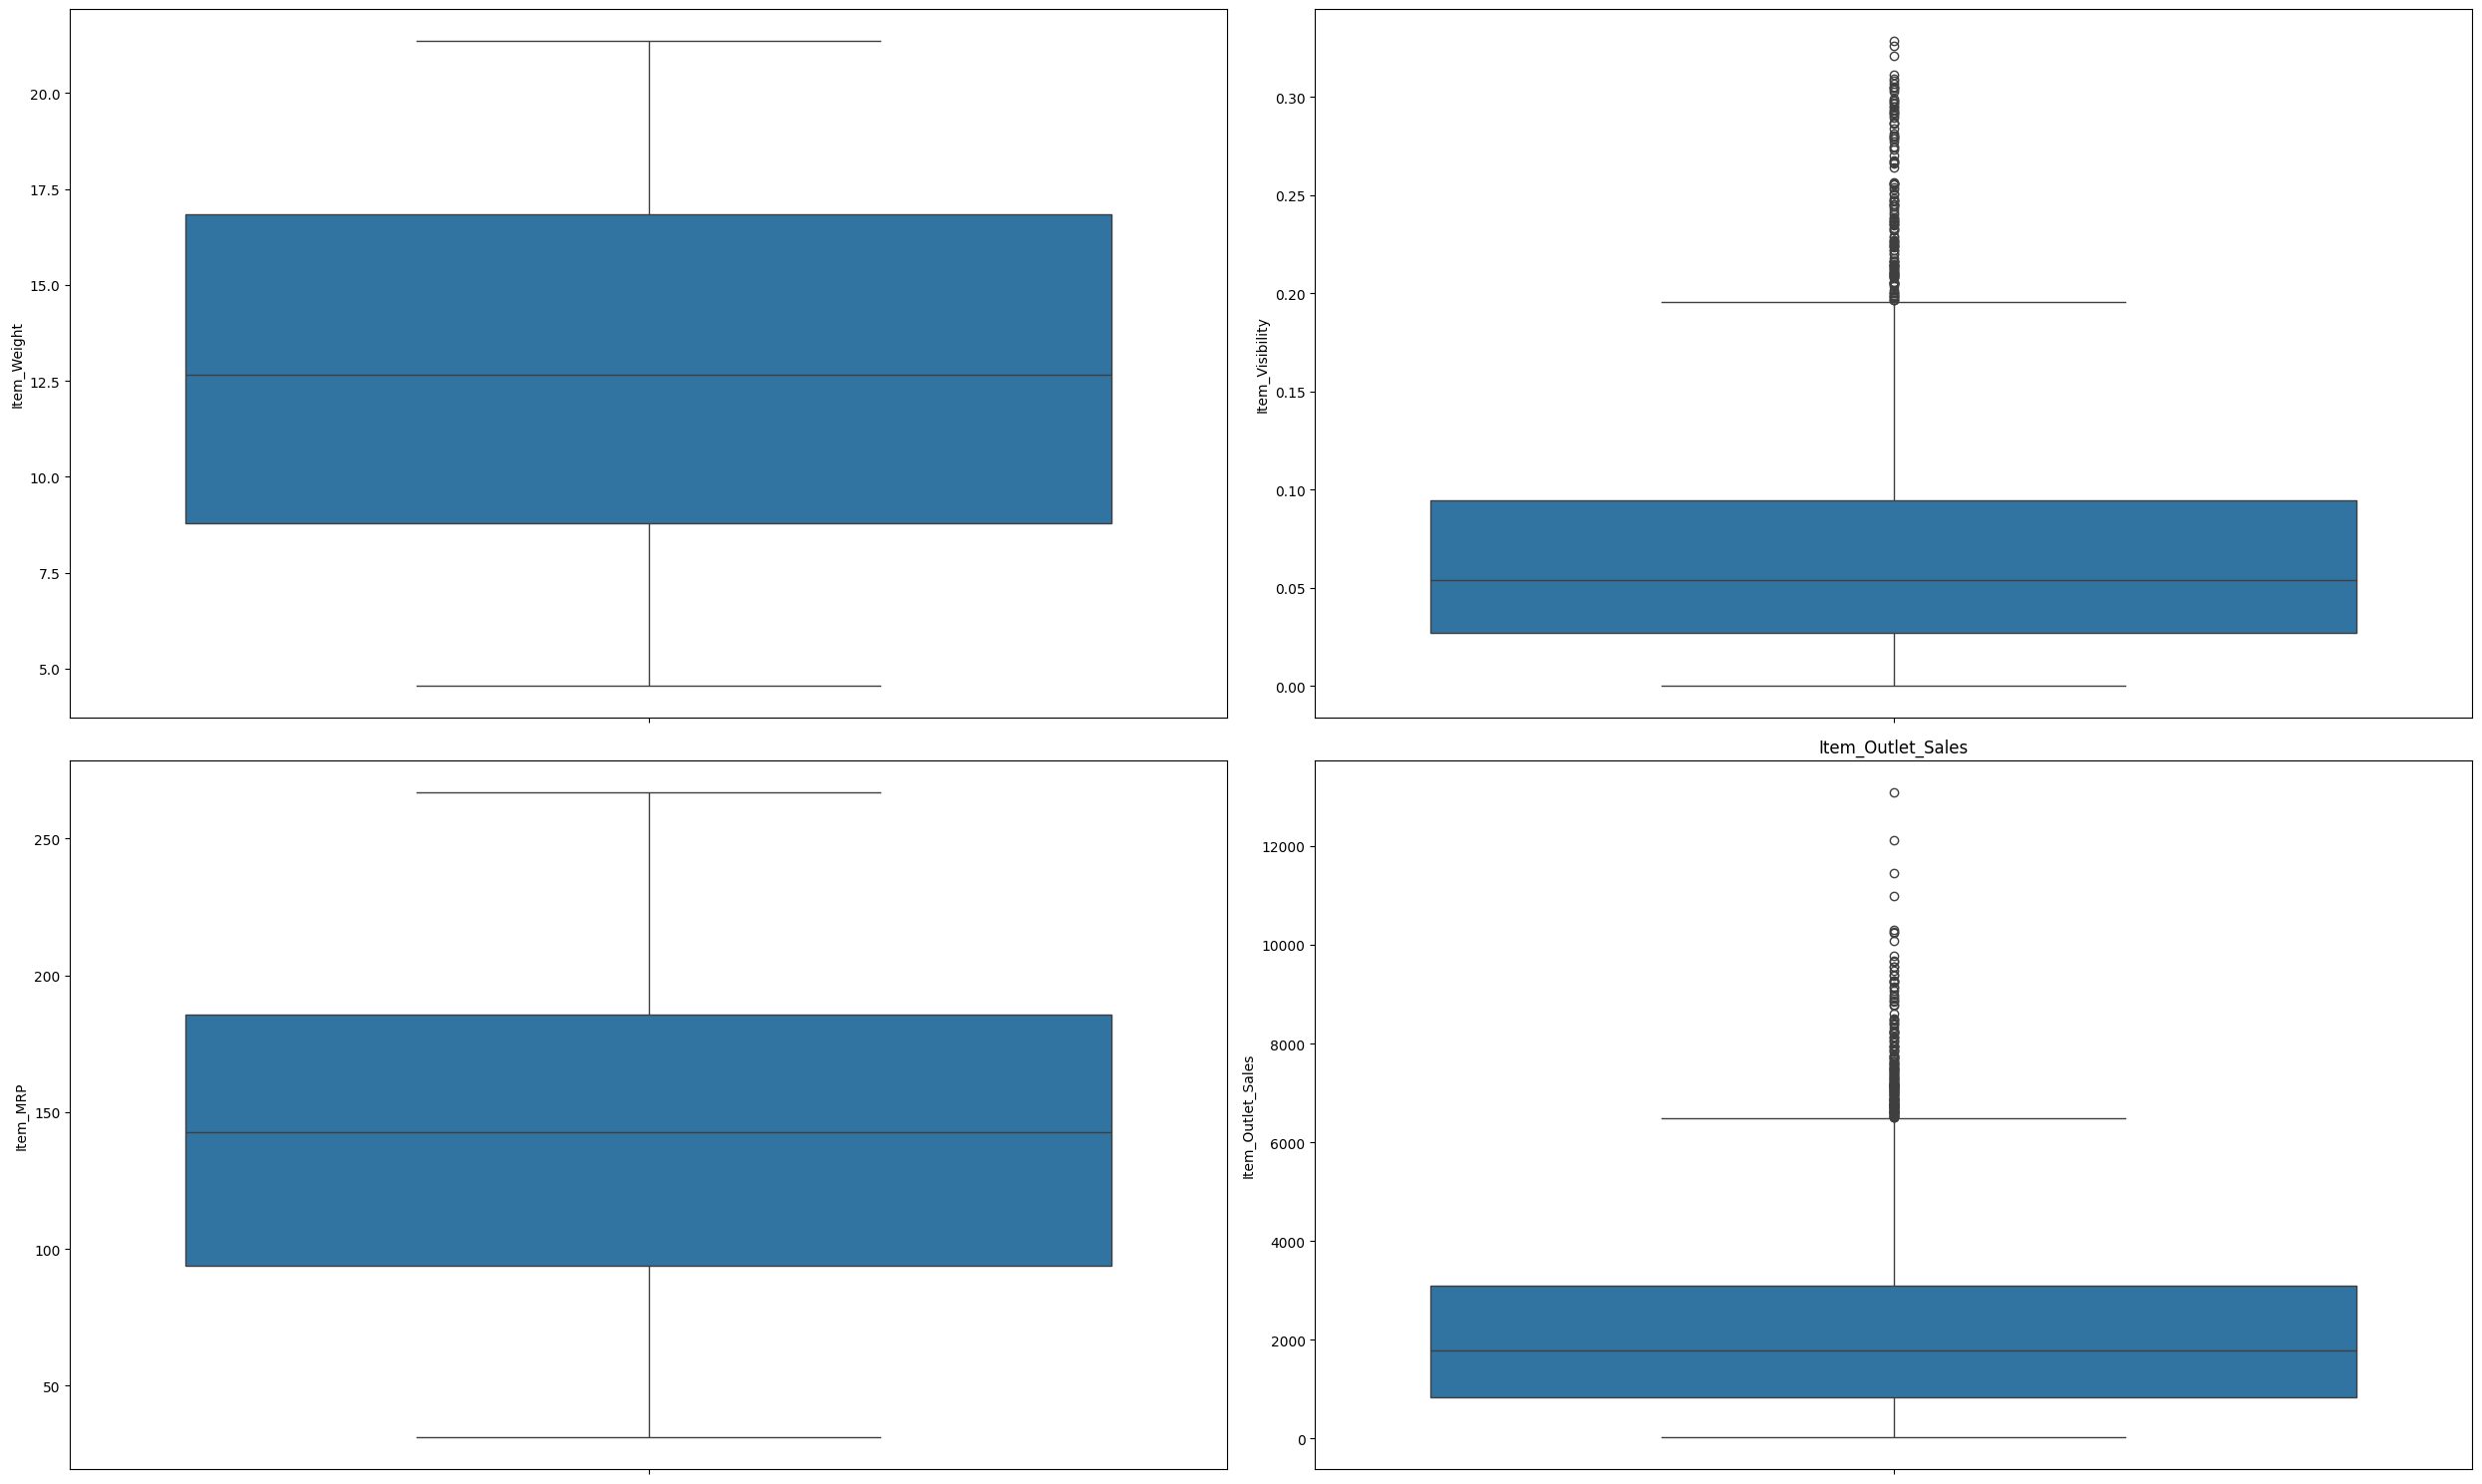

In [133]:
fig, ax= plt.subplots(2,2, figsize=(25,15))

for i, subplot in zip(num_cols, ax.flatten()):
    sns.boxplot(df_sales[i], ax=subplot)
    plt.title(i)

plt.tight_layout()
plt.show()

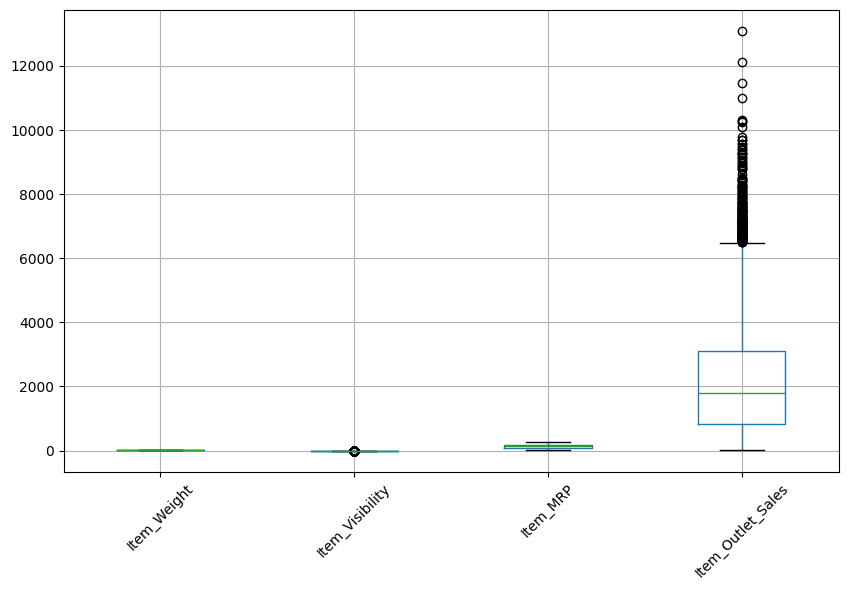

In [134]:
plt.rcParams['figure.figsize']=[10,6]
df_sales.boxplot()
plt.xticks(rotation=45)
plt.show()

In [135]:
# We can use quartiles or z score to remove the outliers on the numerical data

## Scaling

### Standard scalar

In [136]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [137]:
sc=StandardScaler()
mm = MinMaxScaler()

In [138]:
df_num = df_sales.select_dtypes(include= np.number)

sc.fit_transform(df_num)

array([[-0.76976266, -0.97073217,  1.74768499,  0.910601  ],
       [-1.4974647 , -0.90811123, -1.48903161, -1.01844035],
       [ 0.99566834, -0.95691733,  0.00965652, -0.04923754],
       ...,
       [-0.48987725, -0.59978449, -0.89790917, -0.57909963],
       [-1.21973226,  1.53287976, -0.6087732 , -0.19672492],
       [ 0.41436789, -0.41193591, -1.05211502, -0.82959407]])

In [139]:
df_scaled_sc = pd.DataFrame(sc.fit_transform(df_num), columns = df_num.columns)
df_scaled_sc.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0    -0.769763        -0.970732  1.747685           0.910601
1    -1.497465        -0.908111 -1.489032          -1.018440
2     0.995668        -0.956917  0.009657          -0.049238
3     1.361672        -1.281758  0.660212          -0.849103
4    -0.849422        -1.281758 -1.399078          -0.695373

In [140]:
df_scaled_sc.describe()

Item_Weight  Item_Visibility      Item_MRP  Item_Outlet_Sales
count  8.523000e+03     8.523000e+03  8.523000e+03       8.523000e+03
mean   3.934954e-16    -1.092117e-16  4.460171e-17       1.638175e-16
std    1.000059e+00     1.000059e+00  1.000059e+00       1.000059e+00
min   -1.791344e+00    -1.281758e+00 -1.762104e+00      -1.258790e+00
25%   -8.806403e-01    -7.586531e-01 -7.581601e-01      -7.894057e-01
50%   -4.851951e-02    -2.364792e-01  2.732594e-02      -2.267687e-01
75%    8.557256e-01     5.514755e-01  7.172365e-01       5.391513e-01
max    1.824560e+00     5.083050e+00  2.022364e+00       6.391045e+00

### Min max Scalar

In [141]:
# Min Max Scaler
mm.fit_transform(df_num)

array([[0.28252456, 0.04886645, 0.92741935, 0.28358666],
       [0.08127419, 0.05870508, 0.0721562 , 0.03141895],
       [0.77076511, 0.05103696, 0.46816638, 0.15811486],
       ...,
       [0.35992855, 0.10714751, 0.22835314, 0.08885035],
       [0.15808276, 0.44221878, 0.30475382, 0.13883505],
       [0.61000298, 0.13666114, 0.18760611, 0.05610527]])

In [142]:
df_scaled_mm = pd.DataFrame(mm.fit_transform(df_num),columns=df_num.columns)
df_scaled_mm.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0     0.282525         0.048866  0.927419           0.283587
1     0.081274         0.058705  0.072156           0.031419
2     0.770765         0.051037  0.468166           0.158115
3     0.871986         0.000000  0.640068           0.053555
4     0.260494         0.000000  0.095925           0.073651

In [143]:
df_scaled_mm.describe()

Item_Weight  Item_Visibility     Item_MRP  Item_Outlet_Sales
count  8523.000000      8523.000000  8523.000000        8523.000000
mean      0.495407         0.201382     0.465615           0.164551
std       0.276572         0.157123     0.264253           0.130729
min       0.000000         0.000000     0.000000           0.000000
25%       0.251861         0.082187     0.265280           0.061359
50%       0.481989         0.164228     0.472835           0.134908
75%       0.732063         0.288026     0.655136           0.235030
max       1.000000         1.000000     1.000000           1.000000

### Second way of treating the outliers

#### Using z score method

In [144]:
df_sales_copy = df_sales.copy()

In [145]:
pd.get_dummies(df_sales_copy).dtypes

Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Item_Outlet_Sales                float64
Item_Identifier_DRA12               bool
                                  ...   
Outlet_Location_Type_Tier1          bool
Outlet_Type_Grocery Store           bool
Outlet_Type_Supermarket Type1       bool
Outlet_Type_Supermarket Type2       bool
Outlet_Type_Supermarket Type3       bool
Length: 1601, dtype: object

In [146]:
df_sales_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           8523 non-null   object 
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(7)
memory usage: 732.6+ KB


In [147]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [148]:
num_copy = df_sales_copy.select_dtypes(np.number)

In [149]:
df_scaled_copy = pd.DataFrame(sc.fit_transform(num_copy), columns = num_copy.columns)
df_scaled_copy.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0    -0.769763        -0.970732  1.747685           0.910601
1    -1.497465        -0.908111 -1.489032          -1.018440
2     0.995668        -0.956917  0.009657          -0.049238
3     1.361672        -1.281758  0.660212          -0.849103
4    -0.849422        -1.281758 -1.399078          -0.695373

In [150]:
df_rem_zscore = df_scaled_copy[~((df_scaled_copy< (-3)) | (df_scaled_copy> (3))).any(axis=1)]
df_rem_zscore.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0    -0.769763        -0.970732  1.747685           0.910601
1    -1.497465        -0.908111 -1.489032          -1.018440
2     0.995668        -0.956917  0.009657          -0.049238
3     1.361672        -1.281758  0.660212          -0.849103
4    -0.849422        -1.281758 -1.399078          -0.695373

In [151]:
print("Shape before removing outlier", df_sales_copy.shape)
print("Shape after removing outlier", df_rem_zscore.shape)

Shape before removing outlier (8523, 11)
Shape after removing outlier (8338, 4)


### Dealing with the categorical variables


In [152]:
df_sales.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [153]:
df_sales['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

#### One Hot Encoding

In [154]:
df_cat = df_sales.select_dtypes(include='object')
df_cat.head()

Item_Identifier Item_Fat_Content              Item_Type Outlet_Identifier  \
0           FDA15          Low Fat                  Dairy            OUT049   
1           DRC01          Regular            Soft Drinks            OUT018   
2           FDN15          Low Fat                   Meat            OUT049   
3           FDX07          Regular  Fruits and Vegetables            OUT010   
4           NCD19          Low Fat              Household            OUT013   

  Outlet_Size Outlet_Location_Type        Outlet_Type  
0      Medium               Tier 2  Supermarket Type1  
1      Medium               Tier 2  Supermarket Type2  
2      Medium               Tier 2  Supermarket Type1  
3       Small                Tier1      Grocery Store  
4        High               Tier 3  Supermarket Type1

In [155]:
pd.get_dummies(df_cat)

Item_Identifier_DRA12  Item_Identifier_DRA24  Item_Identifier_DRA59  \
0                     False                  False                  False   
1                     False                  False                  False   
2                     False                  False                  False   
3                     False                  False                  False   
4                     False                  False                  False   
...                     ...                    ...                    ...   
8518                  False                  False                  False   
8519                  False                  False                  False   
8520                  False                  False                  False   
8521                  False                  False                  False   
8522                  False                  False                  False   

      Item_Identifier_DRB01  Item_Identifier_DRB13  Item_Identifier_DRB24  \
0                     False                  False                  False   
1                     False                  False                  False   
2                     False                  False                  False   
3                     False                  False                  False   
4                     False                  False                  False   
...                     ...                    ...                    ...   
8518                  False                  False                  False   
8519                  False                  False                  False   
8520                  False                  False                  False   
8521                  False                  False                  False   
8522                  False                  False                  False   

      Item_Identifier_DRB25  Item_Identifier_DRB48  Item_Identifier_DRC01  \
0                     False                  False                  False   
1                     False                  False                   True   
2                     False                  False                  False   
3                     False                  False                  False   
4                     False                  False                  False   
...                     ...                    ...                    ...   
8518                  False                  False                  False   
8519                  False                  False                  False   
8520                  False                  False                  False   
8521                  False                  False                  False   
8522                  False                  False                  False   

      Item_Identifier_DRC12  ...  Outlet_Size_High  Outlet_Size_Medium  \
0                     False  ...             False                True   
1                     False  ...             False                True   
2                     False  ...             False                True   
3                     False  ...             False               False   
4                     False  ...              True               False   
...                     ...  ...               ...                 ...   
8518                  False  ...              True               False   
8519                  False  ...             False               False   
8520                  False  ...             False               False   
8521                  False  ...             False                True   
8522                  False  ...             False               False   

      Outlet_Size_Small  Outlet_Location_Type_Tier 2  \
0                 False                         True   
1                 False                         True   
2                 False                         True   
3                  True                        False   
4                 False                        False   
...   

In [156]:
df_cat.shape

(8523, 7)

In [157]:
pd.get_dummies(df_cat).shape

(8523, 1597)

**The number of columns will increase from 7 to 1600.**

#### Label Encoding

In [158]:
df_sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [159]:
df_cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [160]:
df_sales['Outlet_Size'].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

#### using replace function

In [161]:
df_sales.replace({'Small':1,'Medium':2,"High":3},inplace=True)

In [162]:
df_sales['Outlet_Size'].value_counts()

Outlet_Size
1    4798
2    2793
3     932
Name: count, dtype: int64

In [163]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           8523 non-null   int64  
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


#### Frequency Encoding

In [164]:
df_sales['Item_Type'].value_counts(normalize=True)

Item_Type
Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: proportion, dtype: float64

In [165]:
df_sales['Item_Type'].value_counts(normalize=True).to_dict()

{'Fruits and Vegetables': 0.14455004106535257,
 'Snack Foods': 0.1407954945441746,
 'Household': 0.10676991669599906,
 'Frozen Foods': 0.1004341194415112,
 'Dairy': 0.0800187727326059,
 'Canned': 0.07614689663264108,
 'Baking Goods': 0.07602956705385427,
 'Health and Hygiene': 0.06101138096914232,
 'Soft Drinks': 0.05221166256013141,
 'Meat': 0.04986507098439517,
 'Breads': 0.02944972427548985,
 'Hard Drinks': 0.0251085298603778,
 'Others': 0.019828698814971256,
 'Starchy Foods': 0.017364777660448198,
 'Breakfast': 0.012906253666549338,
 'Seafood': 0.007509093042355978}

In [166]:
norm_items = df_sales['Item_Type'].value_counts(normalize=True).to_dict()

In [167]:
df_sales['Item_Type_PCNT']= df_sales['Item_Type'].map(norm_items)

In [168]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           8523 non-null   int64  
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   float64
 11  Item_Type_PCNT        8523 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 799.2+ KB


#### Outlet Identifier

In [169]:
df_sales['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

1. **If the frequency of occurance is the same then frequency encoding can not be applied. During Model building, machine are unable to recognize the patterns with same frequency**

2. **If the frequency match, we can try out different encoding technique - Target Encoding**


### Target Encoding

**Outlet Identifier**

**Checking how good the correlation is  between Outlet Identifier and Sales**

**ANNOVA**

In [170]:
df_sales.groupby('Outlet_Identifier')['Item_Outlet_Sales'].median()

Outlet_Identifier
OUT010     250.3408
OUT013    2050.6640
OUT017    2005.0567
OUT018    1655.1788
OUT019     265.3213
OUT027    3364.9532
OUT035    2109.2544
OUT045    1834.9448
OUT046    1945.8005
OUT049    1966.1074
Name: Item_Outlet_Sales, dtype: float64

**Outlet 10 and 19 are not performing compared to other outlets. Outlet 27 is the best performing outlet**

In [171]:
df_sales.groupby('Outlet_Identifier')['Item_Outlet_Sales'].median().to_dict()

{'OUT010': 250.3408,
 'OUT013': 2050.664,
 'OUT017': 2005.0567,
 'OUT018': 1655.1788,
 'OUT019': 265.3213,
 'OUT027': 3364.9532,
 'OUT035': 2109.2544,
 'OUT045': 1834.9448,
 'OUT046': 1945.8004999999998,
 'OUT049': 1966.1074}

In [172]:
outlet_id = df_sales.groupby('Outlet_Identifier')['Item_Outlet_Sales'].median().to_dict()

In [173]:
df_sales['Outlet_Id_Trg'] = df_sales['Outlet_Identifier'].map(outlet_id)

In [174]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           8523 non-null   int64  
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   float64
 11  Item_Type_PCNT        8523 non-null   float64
 12  Outlet_Id_Trg         8523 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 865.7+ KB


**Check how good the correlation is  between Outlet Id Trg and Sales**

In [175]:
df_sales[['Outlet_Id_Trg','Item_Outlet_Sales']].corr()

Outlet_Id_Trg  Item_Outlet_Sales
Outlet_Id_Trg           1.000000           0.489391
Item_Outlet_Sales       0.489391           1.000000

**There is high correlation between Outlet Id and Sales. Which is good case for Target Encoding**

#### Item type

In [176]:
df_sales['Item_Type'].nunique()

16

#### Grouping

In [177]:
df_sales['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [178]:
Veg=['Dairy','Fruits and Vegetables','Baking Goods','Snack Foods','Frozen Foods','Breakfast',
     'Canned','Breads','Starchy Foods']
Non_Veg = ['Meat','Seafood']
Drinks =['Soft Drinks','Hard Drinks']
others =['Health and Hygiene','Others']

In [179]:
def food_type(x):
  if x in Veg:
    return('Veg')
  elif x in Non_Veg:
    return("Non_Veg")
  elif x in Drinks:
    return("Drinks")
  else:
    return("Others")


In [180]:
df_sales['Item_Type'].apply(food_type)

0           Veg
1        Drinks
2       Non_Veg
3           Veg
4        Others
         ...   
8518        Veg
8519        Veg
8520     Others
8521        Veg
8522     Drinks
Name: Item_Type, Length: 8523, dtype: object

In [181]:
df_sales['Item_Type_GRP'] =df_sales['Item_Type'].apply(food_type)

In [182]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           8523 non-null   int64  
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   float64
 11  Item_Type_PCNT        8523 non-null   float64
 12  Outlet_Id_Trg         8523 non-null   float64
 13  Item_Type_GRP         8523 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 932.3+ KB


In [183]:
pd.get_dummies(df_sales['Item_Type_GRP'])

Drinks  Non_Veg  Others    Veg
0      False    False   False   True
1       True    False   False  False
2      False     True   False  False
3      False    False   False   True
4      False    False    True  False
...      ...      ...     ...    ...
8518   False    False   False   True
8519   False    False   False   True
8520   False    False    True  False
8521   False    False   False   True
8522    True    False   False  False

[8523 rows x 4 columns]

In [184]:
pd.get_dummies(df_sales['Item_Type_GRP'], drop_first=True)

Non_Veg  Others    Veg
0       False   False   True
1       False   False  False
2        True   False  False
3       False   False   True
4       False    True  False
...       ...     ...    ...
8518    False   False   True
8519    False   False   True
8520    False    True  False
8521    False   False   True
8522    False   False  False

[8523 rows x 3 columns]

In [185]:
df_sales.head(2)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   

   Item_MRP Outlet_Identifier  Outlet_Size Outlet_Location_Type  \
0     249.8            OUT049            2               Tier 2   
1      48.3            OUT018            2               Tier 2   

         Outlet_Type  Item_Outlet_Sales  Item_Type_PCNT  Outlet_Id_Trg  \
0  Supermarket Type1          3735.1380        0.080019      1966.1074   
1  Supermarket Type2           443.4228        0.052212      1655.1788   

  Item_Type_GRP  
0           Veg  
1        Drinks

**Drop the variable which are Insignificant**

In [186]:
df_sales= df_sales.drop(['Outlet_Identifier'],axis=1)

In [187]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Size           8523 non-null   int64  
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  Item_Type_PCNT        8523 non-null   float64
 11  Outlet_Id_Trg         8523 non-null   float64
 12  Item_Type_GRP         8523 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 865.7+ KB


In [188]:
df_sales.head(2)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   

   Item_MRP  Outlet_Size Outlet_Location_Type        Outlet_Type  \
0     249.8            2               Tier 2  Supermarket Type1   
1      48.3            2               Tier 2  Supermarket Type2   

   Item_Outlet_Sales  Item_Type_PCNT  Outlet_Id_Trg Item_Type_GRP  
0          3735.1380        0.080019      1966.1074           Veg  
1           443.4228        0.052212      1655.1788        Drinks

In [189]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Size           8523 non-null   int64  
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  Item_Type_PCNT        8523 non-null   float64
 11  Outlet_Id_Trg         8523 non-null   float64
 12  Item_Type_GRP         8523 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 865.7+ KB


### Feature Engineering

#### Frequency encoding

In [190]:
df_sales['Item_Identifier'].nunique()

1559

In [191]:
df_sales['Item_Identifier'][0][:2]

'FD'

In [192]:
Food_ID = []

for i in df_sales.Item_Identifier:
  Food_ID.append(i[:2])


In [193]:
pd.Series(Food_ID).sort_values(ascending=False).isnull().sum()

0

In [194]:
pd.Series(Food_ID).sort_values(ascending=False).count()

8523

In [195]:
pd.DataFrame(pd.Series(Food_ID))

0
0     FD
1     DR
2     FD
3     FD
4     NC
...   ..
8518  FD
8519  FD
8520  NC
8521  FD
8522  DR

[8523 rows x 1 columns]

In [196]:
df_sales['Item_Identifier'][100]

'FDT28'

In [197]:
df_sales['Item_Identifier'].tail(316)

8207    FDK32
8208    FDM20
8209    NCJ42
8210    FDI50
8211    FDZ15
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 316, dtype: object

In [198]:
df_sales['Item_Identifier'].shape

(8523,)

In [199]:
pd.DataFrame(pd.Series(Food_ID))

0
0     FD
1     DR
2     FD
3     FD
4     NC
...   ..
8518  FD
8519  FD
8520  NC
8521  FD
8522  DR

[8523 rows x 1 columns]

In [200]:
def food_id(x):

  return(x[:2])


In [201]:
df_sales['Item_ID_Code'] =df_sales['Item_Identifier'].apply(food_id)
df_sales.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP  Outlet_Size Outlet_Location_Type  \
0                  Dairy     249.8            2               Tier 2   
1            Soft Drinks      48.3            2               Tier 2   
2                   Meat     141.6            2               Tier 2   
3  Fruits and Vegetables     182.1            1                Tier1   
4              Household      53.9            3               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Item_Type_PCNT  Outlet_Id_Trg  \
0  Supermarket Type1          3735.1380        0.080019      1966.1074   
1  Supermarket Type2           443.4228        0.052212      1655.1788   
2  Supermarket Type1          2097.2700        0.049865      1966.1074   
3      Grocery Store           732.3800        0.144550       250.3408   
4  Supermarket Type1           994.7052        0.106770      2050.6640   

  Item_Type_GRP Item_ID_Code  
0           Veg           FD  
1        Drinks           DR  
2       Non_Veg           FD  
3           Veg           FD  
4        Others           NC

In [202]:
df_sales['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [203]:
df_sales['Item_ID_Code'].value_counts()

Item_ID_Code
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [204]:
df_sales['Item_Identifier'].isnull().sum()

0

In [205]:
df_sales['Item_ID_Code'].isnull().sum()

0

In [206]:
pd.get_dummies(df_sales['Item_ID_Code'])

DR     FD     NC
0     False   True  False
1      True  False  False
2     False   True  False
3     False   True  False
4     False  False   True
...     ...    ...    ...
8518  False   True  False
8519  False   True  False
8520  False  False   True
8521  False   True  False
8522   True  False  False

[8523 rows x 3 columns]

In [207]:
pd.get_dummies(df_sales['Item_ID_Code'],drop_first=True)

FD     NC
0      True  False
1     False  False
2      True  False
3      True  False
4     False   True
...     ...    ...
8518   True  False
8519   True  False
8520  False   True
8521   True  False
8522  False  False

[8523 rows x 2 columns]

### Analysing the data further

**Box Plot Between Item Identifier and Sales**

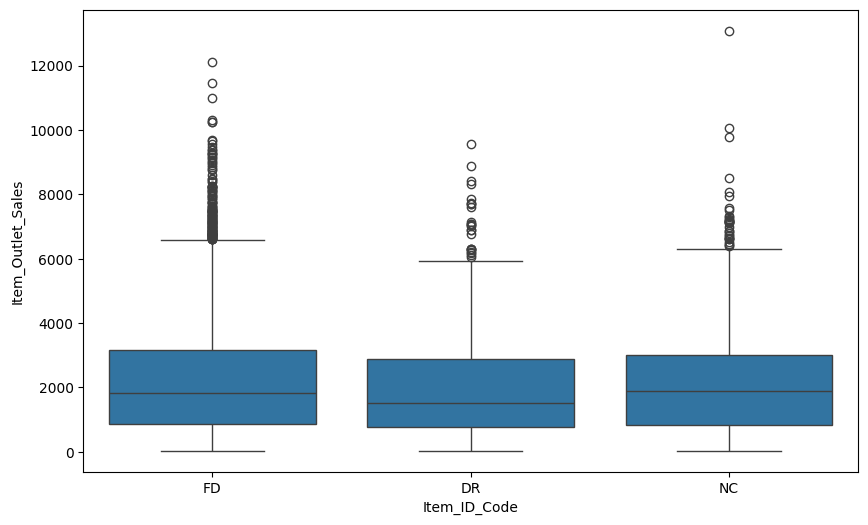

In [208]:
sns.boxplot(x="Item_ID_Code", y="Item_Outlet_Sales", data=df_sales)
plt.show()

**Food is more in demand compared with Non consumable and the drink**

In [211]:
df_sales.groupby("Item_Fat_Content")['Item_Outlet_Sales'].describe()

count         mean          std      min       25%  \
Item_Fat_Content                                                        
Low Fat           5517.0  2157.711534  1697.973824  33.2900  826.2578   
Regular           3006.0  2224.561170  1721.480865  33.9558  857.5504   

                        50%         75%         max  
Item_Fat_Content                                     
Low Fat           1765.0358  3050.69560  13086.9648  
Regular           1844.5989  3198.66965  12117.5600

In [212]:
df_sales.loc[df_sales['Item_ID_Code']=='NC']

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
4              NCD19        8.930          Low Fat         0.000000   
16             NCB42       11.800          Low Fat         0.008596   
22             NCB30       14.600          Low Fat         0.025698   
25             NCD06       13.000          Low Fat         0.099887   
31             NCS17       18.600          Low Fat         0.080829   
...              ...          ...              ...              ...   
8500           NCQ42       20.350          Low Fat         0.000000   
8502           NCH43        8.420          Low Fat         0.070712   
8504           NCN18        8.895          Low Fat         0.124111   
8516           NCJ19       18.600          Low Fat         0.118661   
8520           NCJ29       10.600          Low Fat         0.035186   

               Item_Type  Item_MRP  Outlet_Size Outlet_Location_Type  \
4              Household      53.9            3               Tier 3   
16    Health and Hygiene     115.3            2               Tier 2   
22             Household     196.5            1                Tier1   
25             Household      45.9            1                Tier1   
31    Health and Hygiene      96.4            2               Tier 2   
...                  ...       ...          ...                  ...   
8500           Household     125.2            1                Tier1   
8502           Household     216.4            1                Tier1   
8504           Household     111.8            2               Tier 2   
8516              Others      58.8            2               Tier 2   
8520  Health and Hygiene      85.1            1                Tier1   

            Outlet_Type  Item_Outlet_Sales  Item_Type_PCNT  Outlet_Id_Trg  \
4     Supermarket Type1           994.7052        0.106770      2050.6640   
16    Supermarket Type2          1621.8888        0.061011      1655.1788   
22    Supermarket Type1          1587.2672        0.106770      2109.2544   
25    Supermarket Type1           838.9080        0.106770      2005.0567   
31    Supermarket Type2          2741.7644        0.061011      1655.1788   
...                 ...                ...             ...            ...   
8500  Supermarket Type1          1907.5170        0.106770      2005.0567   
8502  Supermarket Type1          3020.0688        0.106770      1834.9448   
8504  Supermarket Type3          4138.6128        0.106770      3364.9532   
8516  Supermarket Type2           858.8820        0.019829      1655.1788   
8520  Supermarket Type1          1193.1136        0.061011      2109.2544   

     Item_Type_GRP Item_ID_Code  
4           Others           NC  
16          Others           NC  
22          Others           NC  
25          Others           NC  
31          Others           NC  
...            ...          ...  
8500        Others           NC  
8502        Others           NC  
8504        Others           NC  
8516        Others           NC  
8520        Others           NC  

[1599 rows x 14 columns]

In [213]:
df_sales.loc[df_sales['Item_ID_Code']=='NC','Item_Fat_Content']

4       Low Fat
16      Low Fat
22      Low Fat
25      Low Fat
31      Low Fat
         ...   
8500    Low Fat
8502    Low Fat
8504    Low Fat
8516    Low Fat
8520    Low Fat
Name: Item_Fat_Content, Length: 1599, dtype: object

**Item Visibility -Replacing the 0's**

**Though the missing values are none, however there seems to be anamoly in the dataset. Ex: There are 0's which does not seem to logical for visibility**

In [214]:
df_sales['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

**There are several zero's. It does not mean that there is no item placed.**

In [216]:
df_sales.groupby("Item_ID_Code")['Item_Visibility'].median()

Item_ID_Code
DR    0.049179
FD    0.056406
NC    0.044999
Name: Item_Visibility, dtype: float64

<Axes: xlabel='Item_Visibility'>

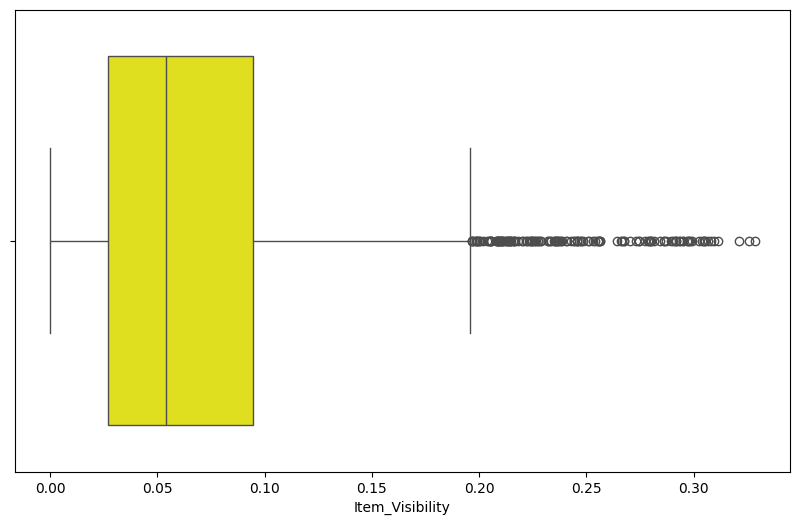

In [217]:
sns.boxplot(df_sales['Item_Visibility'], orient='h',color='yellow')

In [218]:
df_sales.groupby("Item_ID_Code")['Item_Visibility'].apply(
    lambda x: x.replace(0,x.median()))

Item_ID_Code      
DR            1       0.019278
              18      0.034238
              27      0.019356
              34      0.097904
              37      0.113124
                        ...   
NC            8500    0.044999
              8502    0.070712
              8504    0.124111
              8516    0.118661
              8520    0.035186
Name: Item_Visibility, Length: 8523, dtype: float64

In [ ]:
Removing the unwanted columns

In [223]:
df_sales_new = df_sales.drop(['Item_Identifier','Item_Type'],axis=1)
df_sales_new.shape

(8523, 12)

**Dummy Encoding all of them**

In [224]:
pd.get_dummies(df_sales_new) [:2]

Item_Weight  Item_Visibility  Item_MRP  Outlet_Size  Item_Outlet_Sales  \
0         9.30         0.016047     249.8            2          3735.1380   
1         5.92         0.019278      48.3            2           443.4228   

   Item_Type_PCNT  Outlet_Id_Trg  Item_Fat_Content_Low Fat  \
0        0.080019      1966.1074                      True   
1        0.052212      1655.1788                     False   

   Item_Fat_Content_Regular  Outlet_Location_Type_Tier 2  ...  \
0                     False                         True  ...   
1                      True                         True  ...   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                           True                          False   
1                          False                           True   

   Outlet_Type_Supermarket Type3  Item_Type_GRP_Drinks  Item_Type_GRP_Non_Veg  \
0                          False                 False                  False   
1                          False                  True                  False   

   Item_Type_GRP_Others  Item_Type_GRP_Veg  Item_ID_Code_DR  Item_ID_Code_FD  \
0                 False               True            False             True   
1                 False              False             True            False   

   Item_ID_Code_NC  
0            False  
1            False  

[2 rows x 23 columns]

In [225]:
pd.get_dummies(df_sales_new,drop_first=True)[:2]

Item_Weight  Item_Visibility  Item_MRP  Outlet_Size  Item_Outlet_Sales  \
0         9.30         0.016047     249.8            2          3735.1380   
1         5.92         0.019278      48.3            2           443.4228   

   Item_Type_PCNT  Outlet_Id_Trg  Item_Fat_Content_Regular  \
0        0.080019      1966.1074                     False   
1        0.052212      1655.1788                      True   

   Outlet_Location_Type_Tier 3  Outlet_Location_Type_Tier1  \
0                        False                       False   
1                        False                       False   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                           True                          False   
1                          False                           True   

   Outlet_Type_Supermarket Type3  Item_Type_GRP_Non_Veg  Item_Type_GRP_Others  \
0                          False                  False                 False   
1                          False                  False                 False   

   Item_Type_GRP_Veg  Item_ID_Code_FD  Item_ID_Code_NC  
0               True             True            False  
1              False            False            False

1. **The columns -Item_Type_PCNT, Outlet_Id_Trg, Outlet_Size are actually categorical. Since they are encoded, it is displayed as int64**
2. **The numerical columns are -Item_Weight, Item_Visibility,Item_MRP and Item_Outlet_Sales**

In [226]:
df_cat = df_sales_new.drop(['Item_Weight','Item_Visibility','Item_MRP'],axis=1)
df_cat.columns

Index(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_PCNT', 'Outlet_Id_Trg',
       'Item_Type_GRP', 'Item_ID_Code'],
      dtype='object')

In [228]:
pd.get_dummies(df_cat)[:2]

Outlet_Size  Item_Outlet_Sales  Item_Type_PCNT  Outlet_Id_Trg  \
0            2          3735.1380        0.080019      1966.1074   
1            2           443.4228        0.052212      1655.1788   

   Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                      True                     False   
1                     False                      True   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                         True                        False   
1                         True                        False   

   Outlet_Location_Type_Tier1  Outlet_Type_Grocery Store  \
0                       False                      False   
1                       False                      False   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                           True                          False   
1                          False                           True   

   Outlet_Type_Supermarket Type3  Item_Type_GRP_Drinks  Item_Type_GRP_Non_Veg  \
0                          False                 False                  False   
1                          False                  True                  False   

   Item_Type_GRP_Others  Item_Type_GRP_Veg  Item_ID_Code_DR  Item_ID_Code_FD  \
0                 False               True            False             True   
1                 False              False             True            False   

   Item_ID_Code_NC  
0            False  
1            False

In [229]:
pd.get_dummies(df_cat,drop_first=True)[:2]

Outlet_Size  Item_Outlet_Sales  Item_Type_PCNT  Outlet_Id_Trg  \
0            2          3735.1380        0.080019      1966.1074   
1            2           443.4228        0.052212      1655.1788   

   Item_Fat_Content_Regular  Outlet_Location_Type_Tier 3  \
0                     False                        False   
1                      True                        False   

   Outlet_Location_Type_Tier1  Outlet_Type_Supermarket Type1  \
0                       False                           True   
1                       False                          False   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  \
0                          False                          False   
1                           True                          False   

   Item_Type_GRP_Non_Veg  Item_Type_GRP_Others  Item_Type_GRP_Veg  \
0                  False                 False               True   
1                  False                 False              False   

   Item_ID_Code_FD  Item_ID_Code_NC  
0             True            False  
1            False            False

In [230]:
df_dummy = pd.get_dummies(df_cat,drop_first=True)
df_dummy.head(2)

Outlet_Size  Item_Outlet_Sales  Item_Type_PCNT  Outlet_Id_Trg  \
0            2          3735.1380        0.080019      1966.1074   
1            2           443.4228        0.052212      1655.1788   

   Item_Fat_Content_Regular  Outlet_Location_Type_Tier 3  \
0                     False                        False   
1                      True                        False   

   Outlet_Location_Type_Tier1  Outlet_Type_Supermarket Type1  \
0                       False                           True   
1                       False                          False   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  \
0                          False                          False   
1                           True                          False   

   Item_Type_GRP_Non_Veg  Item_Type_GRP_Others  Item_Type_GRP_Veg  \
0                  False                 False               True   
1                  False                 False              False   

   Item_ID_Code_FD  Item_ID_Code_NC  
0             True            False  
1            False            False

In [231]:
df_dummy.reset_index(inplace=True,drop=True)
df_scaled_sc.reset_index(inplace=True,drop=True)

In [232]:
df_sales_final = pd.concat([df_scaled_sc,df_dummy],axis=1)

In [233]:
df_sales_final.reset_index(inplace=True,drop=True)

In [235]:
df_sales_final

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  Outlet_Size  \
0       -0.769763        -0.970732  1.747685           0.910601            2   
1       -1.497465        -0.908111 -1.489032          -1.018440            2   
2        0.995668        -0.956917  0.009657          -0.049238            2   
3        1.361672        -1.281758  0.660212          -0.849103            1   
4       -0.849422        -1.281758 -1.399078          -0.695373            3   
...           ...              ...       ...                ...          ...   
8518    -1.294010        -0.181193  1.180657           0.349915            3   
8519    -0.967835        -0.371154 -0.526851          -0.956402            1   
8520    -0.489877        -0.599784 -0.897909          -0.579100            1   
8521    -1.219732         1.532880 -0.608773          -0.196725            2   
8522     0.414368        -0.411936 -1.052115          -0.829594            1   

      Item_Outlet_Sales  Item_Type_PCNT  Outlet_Id_Trg  \
0             3735.1380        0.080019      1966.1074   
1              443.4228        0.052212      1655.1788   
2             2097.2700        0.049865      1966.1074   
3              732.3800        0.144550       250.3408   
4              994.7052        0.106770      2050.6640   
...                 ...             ...            ...   
8518          2778.3834        0.140795      2050.6640   
8519           549.2850        0.076030      1834.9448   
8520          1193.1136        0.061011      2109.2544   
8521          1845.5976        0.140795      1655.1788   
8522           765.6700        0.052212      1945.8005   

      Item_Fat_Content_Regular  Outlet_Location_Type_Tier 3  \
0                        False                        False   
1                         True                        False   
2                        False                        False   
3                         True                        False   
4                        False                         True   
...                        ...                          ...   
8518                     False                         True   
8519                      True                        False   
8520                     False                        False   
8521                      True                        False   
8522                     False                        False   

      Outlet_Location_Type_Tier1  Outlet_Type_Supermarket Type1  \
0                          False                           True   
1                          False                          False   
2                          False                           True   
3                           True                          False   
4                          False                           True   
...                          ...                            ...   
8518                       False                           True   
8519                        True                           True   
8520                        True                           True   
8521                       False                          False   
8522                        True                           True   

      Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  \
0                             False                          False   
1                              True                          False   
2                             False                          False   
3                             False                          False   
4                             False                          False   
...                             ...                            ...   
8518                          False                          False   
8519                          False                          False   
8520                          False                          False   
8521                           True                          False   
8522            

#### Final dataset for the further anlysis is ready